In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller



df = pd.read_csv(r'sales.csv')
df

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date
0,0,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,08/11/2017
1,1,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,08/11/2017
2,2,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12/06/2017
3,3,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11/10/2016
4,4,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11/10/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9795,9796,CA-2017-125920,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,21/05/2017
9796,9796,9797,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,12/01/2016
9797,9797,9798,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,12/01/2016
9798,9798,9799,CA-2016-128608,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,12/01/2016


In [29]:
df.isna().sum()
df.dropna( subset=['Postal Code'],inplace=True)

print(df.duplicated().sum())
# Remove duplicates (if any)
df = df.drop_duplicates()

0


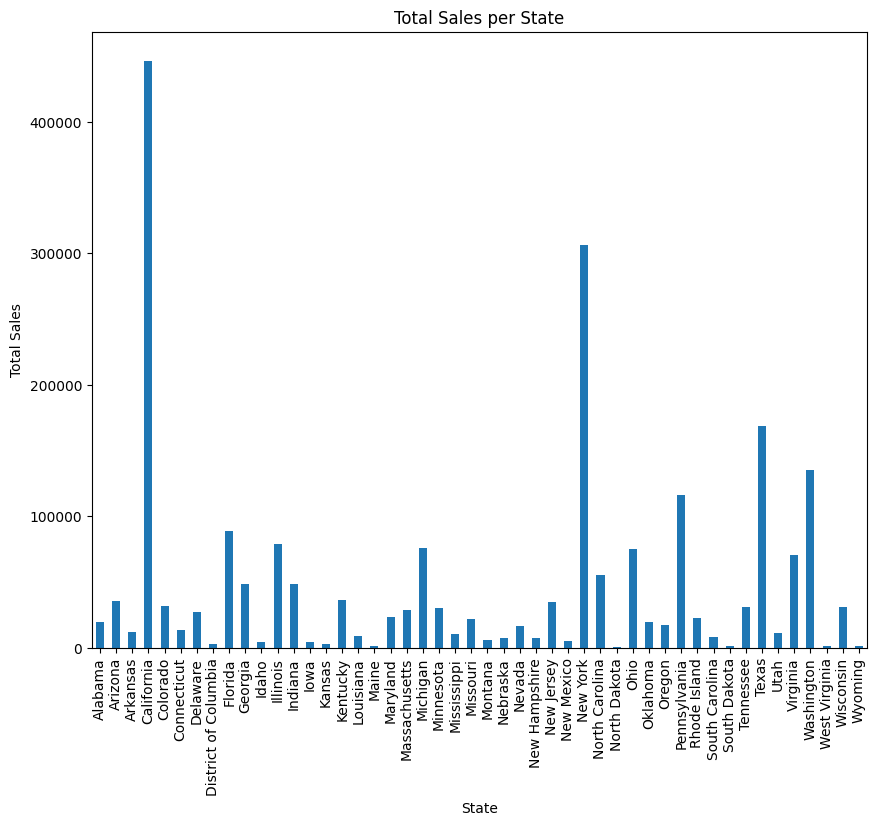

In [30]:
# Group the data by state and calculate total sales
sales_by_state = df.groupby('State')['Sales'].sum()

# Plot total sales per state
plt.figure(figsize=(10, 8))
sales_by_state.plot(kind='bar')
plt.title('Total Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

In [31]:
# Choose two other meaningful columns to plot based on the sales data
# For example, let's choose 'Category' and 'Segment'
sales_by_category = df.groupby('Category')['Sales'].sum()
sales_by_segment = df.groupby('Segment')['Sales'].sum()

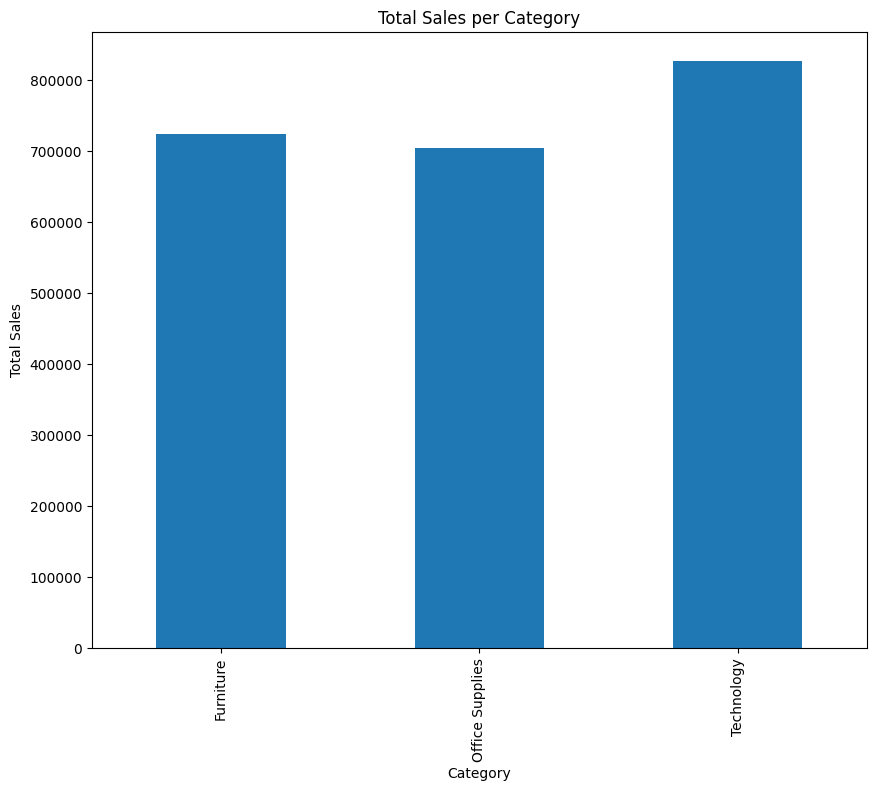

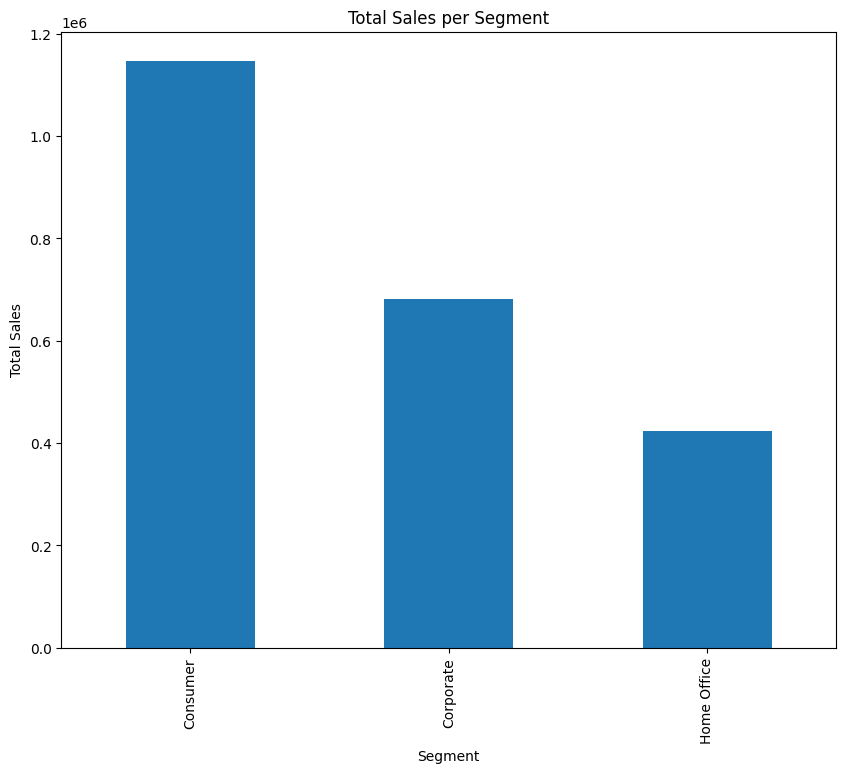

In [32]:
# Plot total sales per category
plt.figure(figsize=(10, 8))
sales_by_category.plot(kind='bar')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# Plot total sales per segment
plt.figure(figsize=(10, 8))
sales_by_segment.plot(kind='bar')
plt.title('Total Sales per Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

In [33]:
df['Order_Date']

0       08/11/2017
1       08/11/2017
2       12/06/2017
3       11/10/2016
4       11/10/2016
           ...    
9795    21/05/2017
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
Name: Order_Date, Length: 9789, dtype: object

In [34]:
# Plot the total sales data per month
df['Order_Date'] = pd.to_datetime(df['Order_Date']
                                  ,format= '%d/%m/%Y'
                                  )

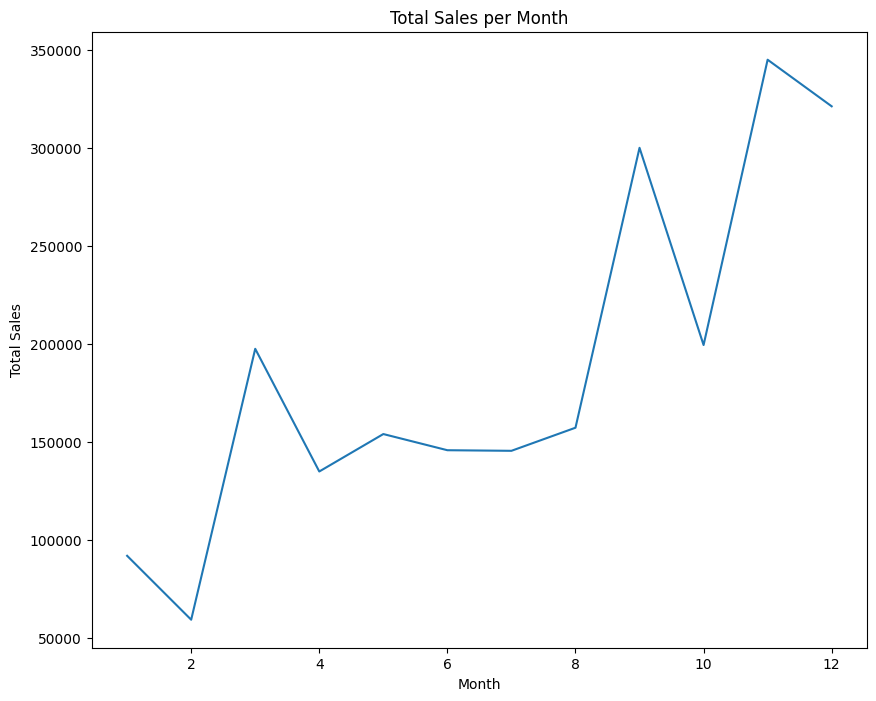

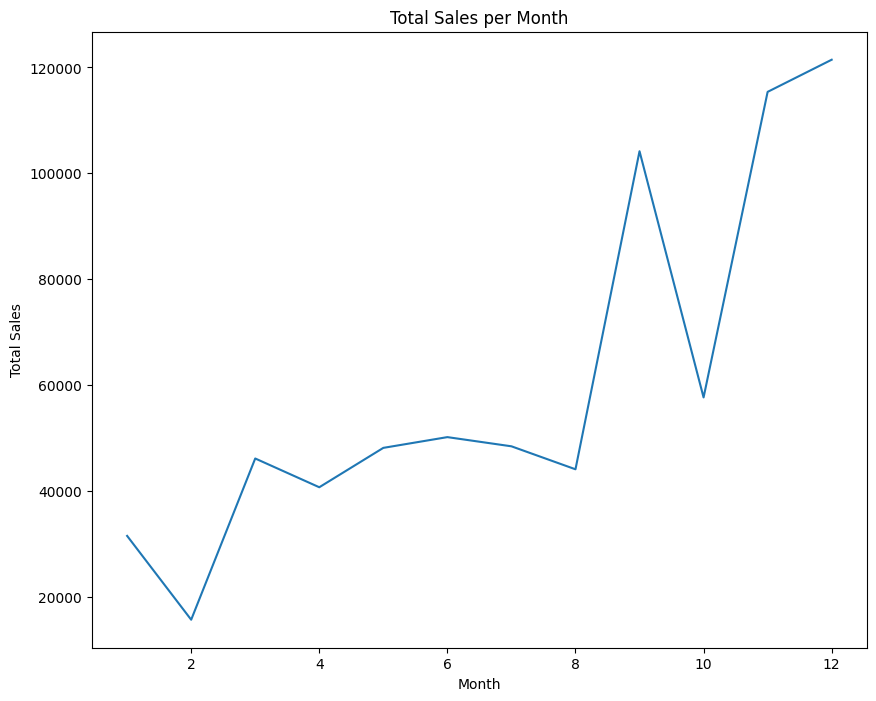

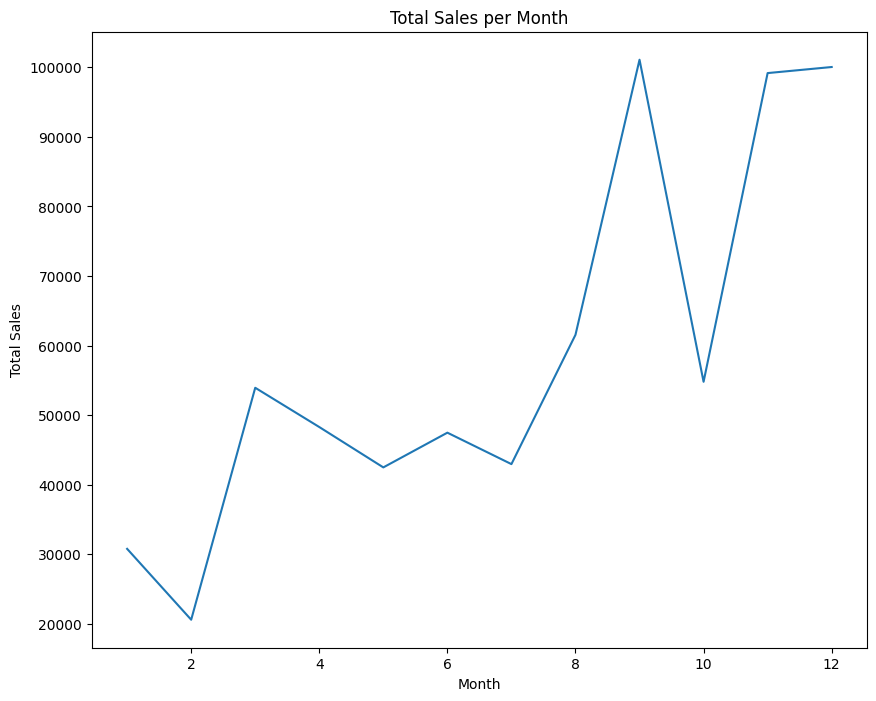

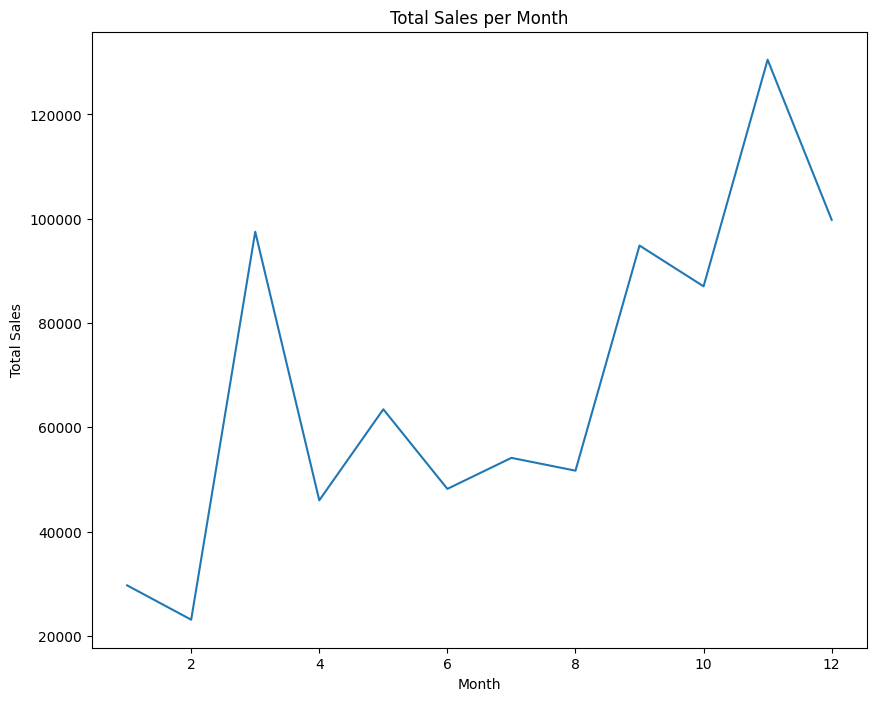

In [35]:
df['Month'] = df['Order_Date'].dt.month
sales_by_month = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 8))
sales_by_month.plot(kind='line')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()




# Plot the total sales per month for each unique category
for category in df['Category'].unique():
    sales_by_month_category = df[df['Category'] == category].groupby('Month')['Sales'].sum()
    plt.figure(figsize=(10, 8))
    sales_by_month_category.plot(kind='line')
    plt.title(f'Total Sales per Month')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()

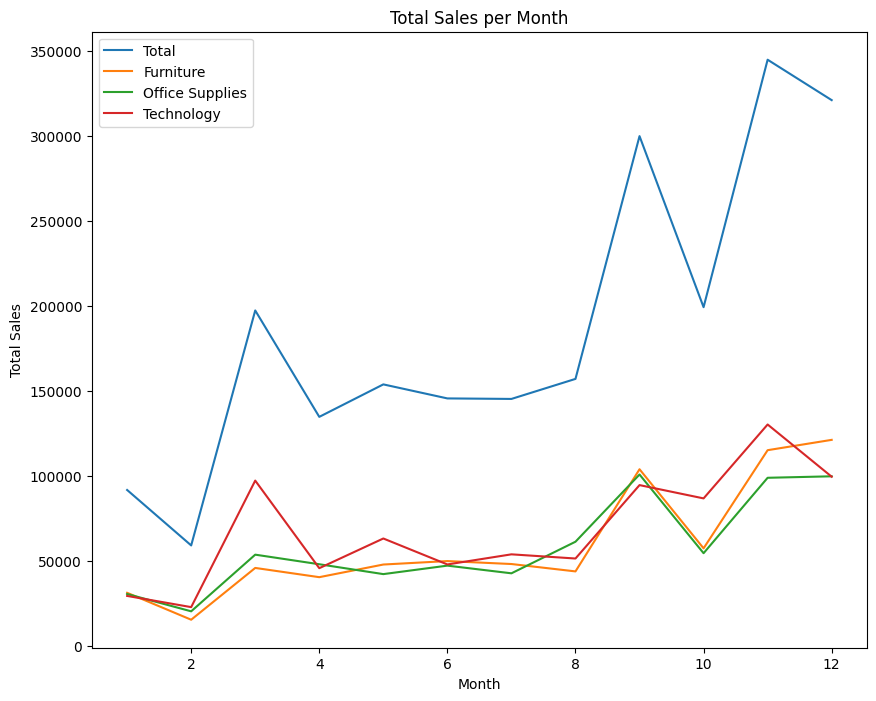

In [36]:
df['Month'] = df['Order_Date'].dt.month
sales_by_month = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 8))
sales_by_month.plot(kind='line',label='Total')





# Plot the total sales per month for each unique category
for category in df['Category'].unique():
    sales_by_month_category = df[df['Category'] == category].groupby('Month')['Sales'].sum()
    sales_by_month_category.plot(kind='line',label=category)
 

plt.title(f'Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


# Q2

In [37]:
# df.isna().sum()

# #%%
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(25,10))
# sns.barplot(x='State',y='Sales',data=df)
# plt.show()


# # %%
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# categorical_cols = df.select_dtypes(include=['object']).columns

# df_cat = df[categorical_cols]
# df_num =df[numeric_cols]
# #%%
# Q1 =df_num.quantile(.25)
# Q3 =df_num.quantile(.75)
# IQR=Q3-Q1

# # %%
# outliers = ((df_num < (Q1-1.5 * IQR))| (df_num > (Q3+1.5 * IQR)))
# # %%
# print(outliers)









# # %%
# y=df['Sales']


# # %%
# df2 =df.copy()
# df2.drop(columns=['Sales'],inplace=True)

# # %%
# print(df.isnull().sum())
# df.dropna( subset=['Postal Code'],inplace=True)
# print(df.isnull().sum())
# #%%





# Q2

In [38]:
sales_pm_df = pd.DataFrame(sales_by_month).reset_index()

# Import necessary libraries

In [39]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(x=sales_by_month, model='additive')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [40]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(period=12,sales_by_month, model='additive')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

SyntaxError: positional argument follows keyword argument (<ipython-input-40-72b5496259ff>, line 4)

In [41]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(sales_by_month,period=12, model='additive')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

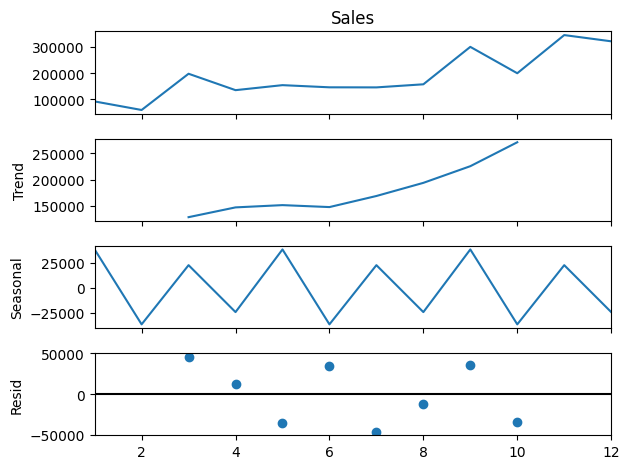

In [42]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(sales_by_month,period=4, model='additive')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

In [43]:
df['Month']

0       11
1       11
2        6
3       10
4       10
        ..
9795     5
9796     1
9797     1
9798     1
9799     1
Name: Month, Length: 9789, dtype: int32

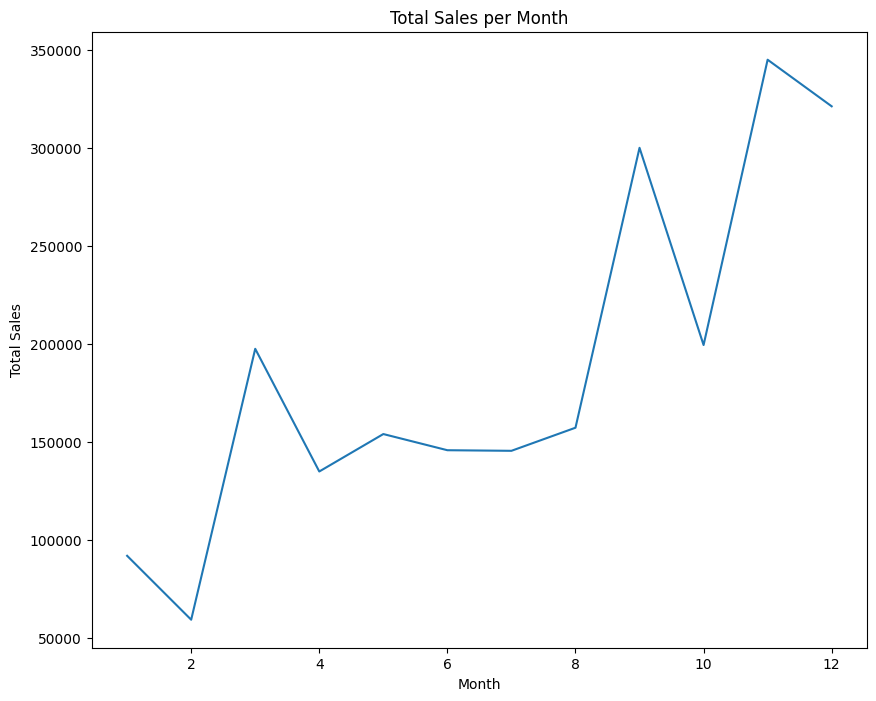

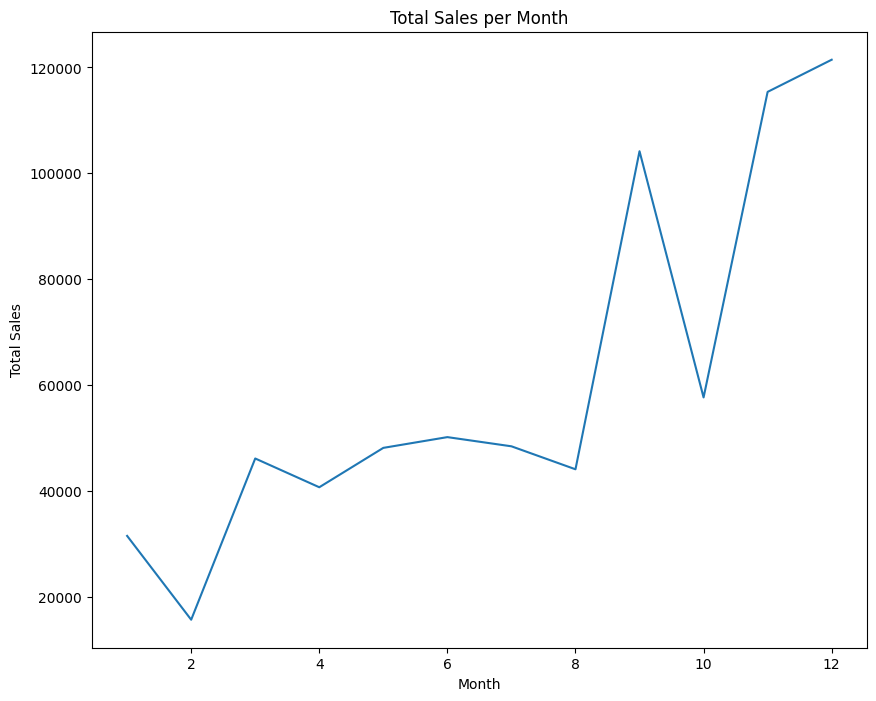

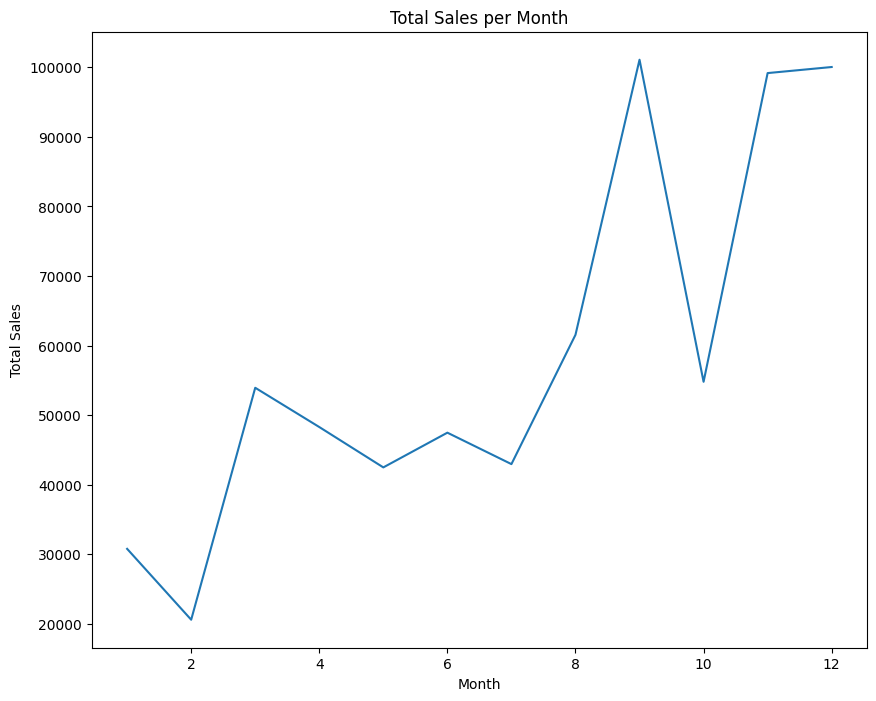

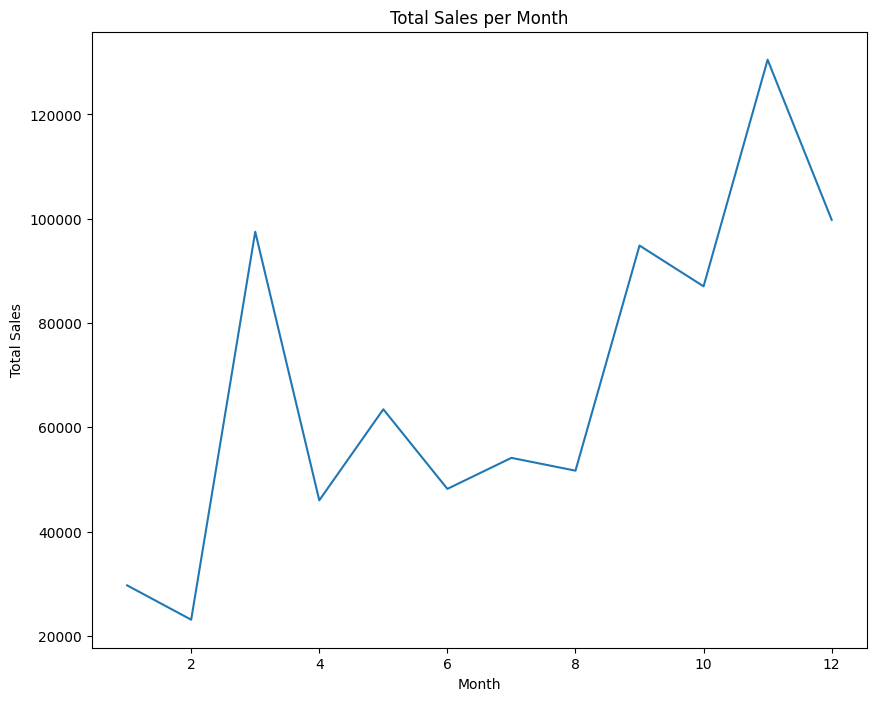

In [44]:
df['Month'] = df['Order_Date'].dt.month
df['Yearmonth'] = df['Order_Date'].dt.to_period('M')

sales_by_month = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 8))
sales_by_month.plot(kind='line')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()




# Plot the total sales per month for each unique category
for category in df['Category'].unique():
    sales_by_month_category = df[df['Category'] == category].groupby('Month')['Sales'].sum()
    plt.figure(figsize=(10, 8))
    sales_by_month_category.plot(kind='line')
    plt.title(f'Total Sales per Month')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()

In [45]:
df['Yearmonth']

0       2017-11
1       2017-11
2       2017-06
3       2016-10
4       2016-10
         ...   
9795    2017-05
9796    2016-01
9797    2016-01
9798    2016-01
9799    2016-01
Name: Yearmonth, Length: 9789, dtype: period[M]

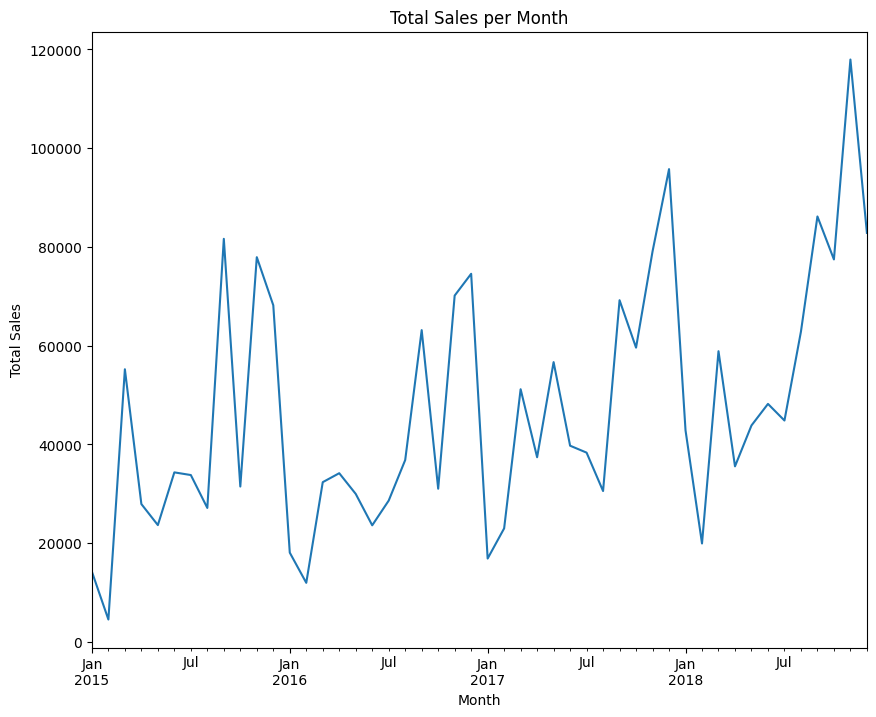

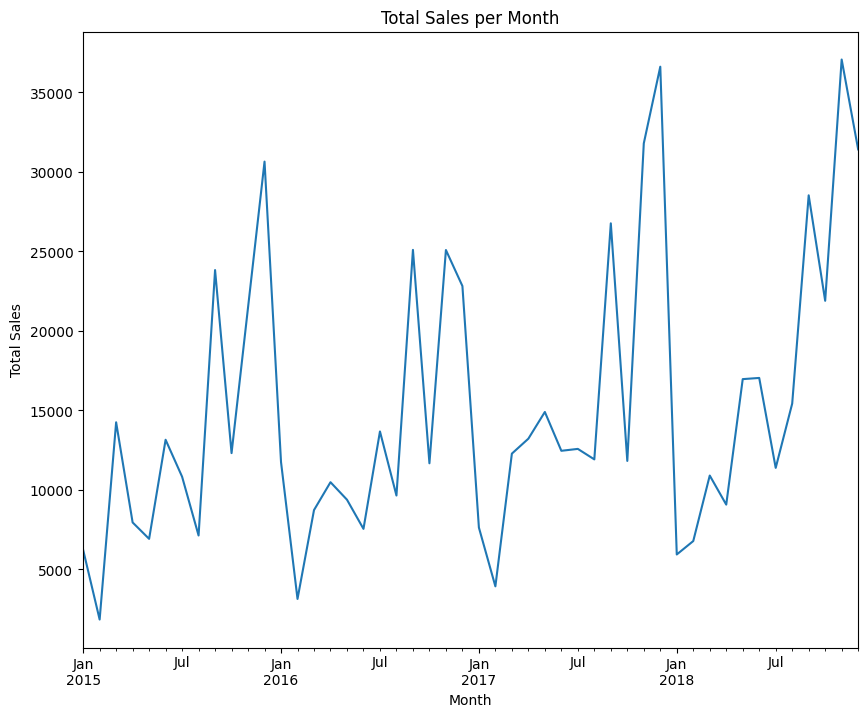

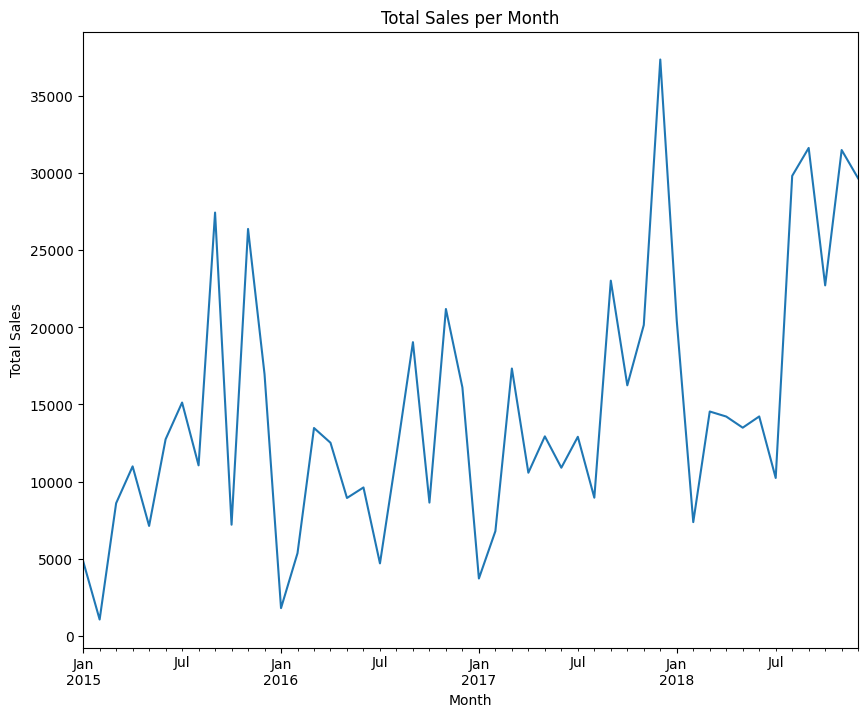

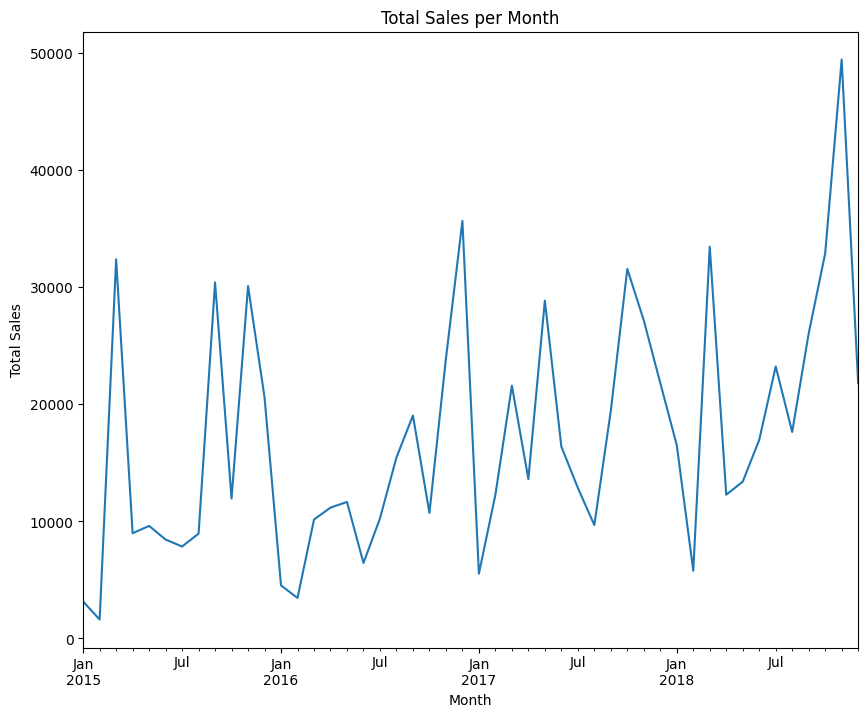

In [46]:
# df['Month'] = df['Order_Date'].dt.month
df['Month'] = df['Order_Date'].dt.to_period('M')

sales_by_month = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 8))
sales_by_month.plot(kind='line')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()




# Plot the total sales per month for each unique category
for category in df['Category'].unique():
    sales_by_month_category = df[df['Category'] == category].groupby('Month')['Sales'].sum()
    plt.figure(figsize=(10, 8))
    sales_by_month_category.plot(kind='line')
    plt.title(f'Total Sales per Month')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()

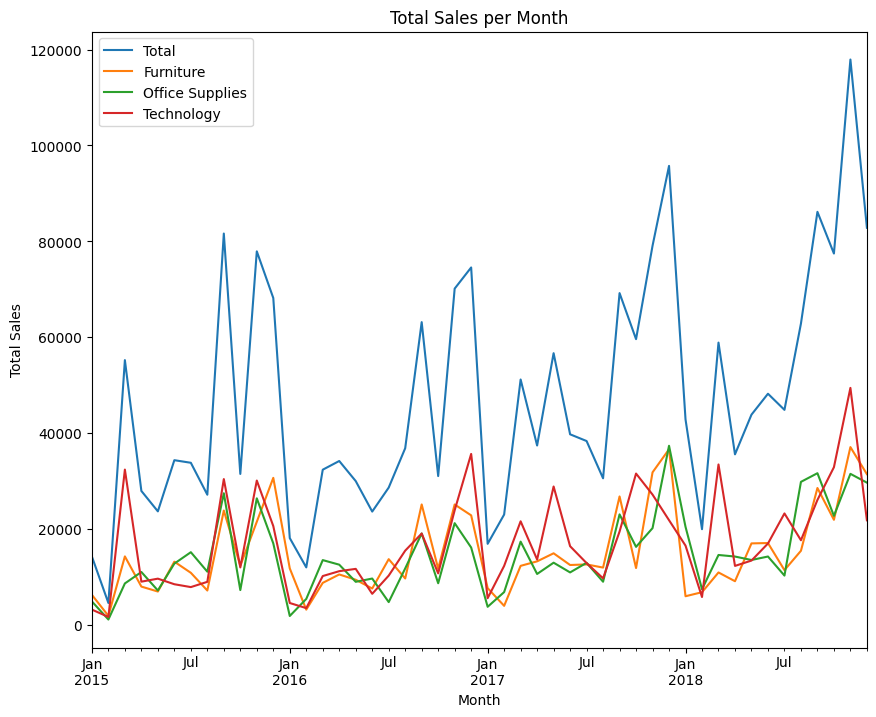

In [47]:
# df['Month'] = df['Order_Date'].dt.month
# sales_by_month = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 8))
sales_by_month.plot(kind='line',label='Total')





# Plot the total sales per month for each unique category
for category in df['Category'].unique():
    sales_by_month_category = df[df['Category'] == category].groupby('Month')['Sales'].sum()
    sales_by_month_category.plot(kind='line',label=category)
 

plt.title(f'Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


# Q2

In [48]:
# df.isna().sum()

# #%%
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(25,10))
# sns.barplot(x='State',y='Sales',data=df)
# plt.show()


# # %%
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# categorical_cols = df.select_dtypes(include=['object']).columns

# df_cat = df[categorical_cols]
# df_num =df[numeric_cols]
# #%%
# Q1 =df_num.quantile(.25)
# Q3 =df_num.quantile(.75)
# IQR=Q3-Q1

# # %%
# outliers = ((df_num < (Q1-1.5 * IQR))| (df_num > (Q3+1.5 * IQR)))
# # %%
# print(outliers)









# # %%
# y=df['Sales']


# # %%
# df2 =df.copy()
# df2.drop(columns=['Sales'],inplace=True)

# # %%
# print(df.isnull().sum())
# df.dropna( subset=['Postal Code'],inplace=True)
# print(df.isnull().sum())
# #%%





# Q2

In [49]:
sales_pm_df = pd.DataFrame(sales_by_month).reset_index()

# Import necessary libraries

ConversionError: Failed to convert value(s) to axis units: (datetime.date(1970, 1, 1), datetime.date(1970, 1, 2))

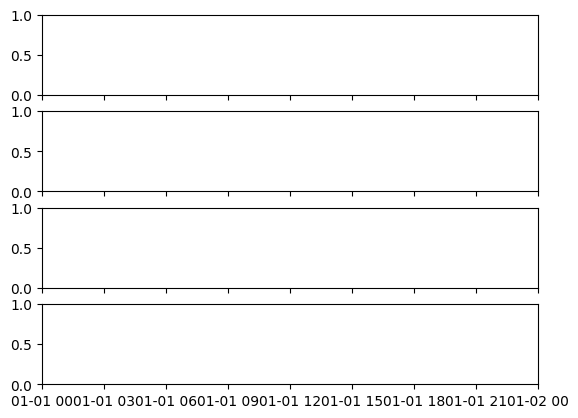

In [50]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(sales_by_month,period=4, model='additive')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

ConversionError: Failed to convert value(s) to axis units: (datetime.date(1970, 1, 1), datetime.date(1970, 1, 2))

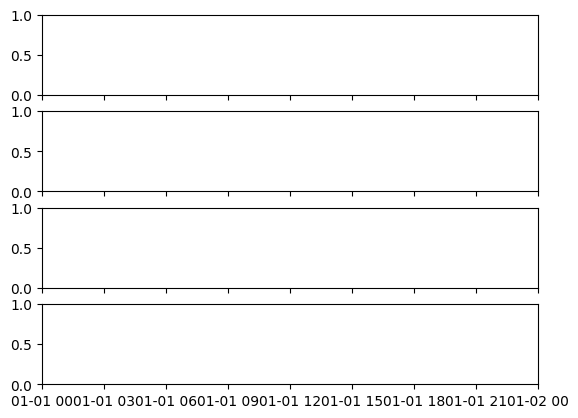

In [51]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(sales_by_month,period=12, model='additive')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

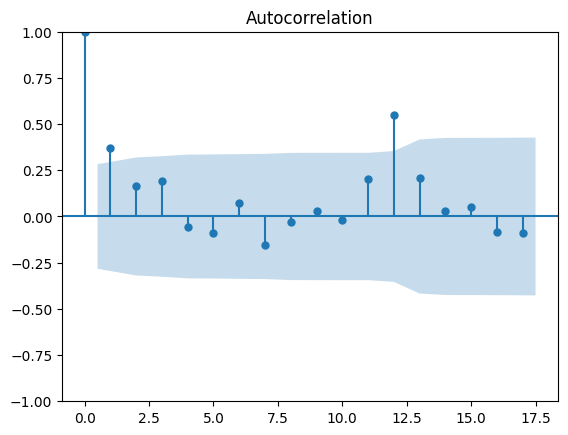

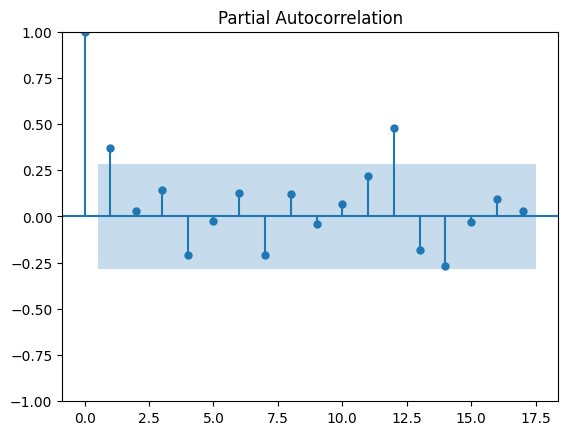

ADF Statistic: -4.424951605714013
p-value: 0.00026806297280114645


In [52]:
# b. Generate the ACF and PACF plots
plot_acf(sales_by_month)
plt.show()
# The ACF plot shows the autocorrelation of the sales data at different lags.

plot_pacf(sales_by_month)
plt.show()
# The PACF plot shows the partial autocorrelation of the sales data at different lags.

# c. Check for stationarity using the Dickey-Fuller test
result = adfuller(sales_by_month)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
# If the p-value is less than 0.05, the sales data is stationary. Otherwise, it's non-stationary.

In [53]:
# Q3
# Import necessary libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [54]:
# Assuming sales_by_month is your time series
# Fit the Holt-Winters exponential smoothing model
model = ExponentialSmoothing(sales_by_month, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Print the model parameters
print(model_fit.params)

# Assess the model fit/performance
print(model_fit.summary())

{'smoothing_level': np.float64(0.14642857142857144), 'smoothing_trend': np.float64(0.14642857142857144), 'smoothing_seasonal': np.float64(0.0001), 'damping_trend': nan, 'initial_level': np.float64(40685.58190361109), 'initial_trend': np.float64(-227.3932145959568), 'initial_seasons': array([-18834.325086  , -27125.55971516,   1487.60598623, -10976.24914988,
        -4384.03567905, -11452.87993738,  -8951.223686  , -11640.318636  ,
        27919.12513623,  -2871.83758183,  31760.24971956,  35069.44862928]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                     4342485012.607
Optimized:                         True   AIC                            911.385
Trend:                         Additive   BIC                            941.324
Seasonal:                

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ConversionError: Failed to convert value(s) to axis units: (datetime.date(1970, 1, 1), datetime.date(1970, 1, 2))

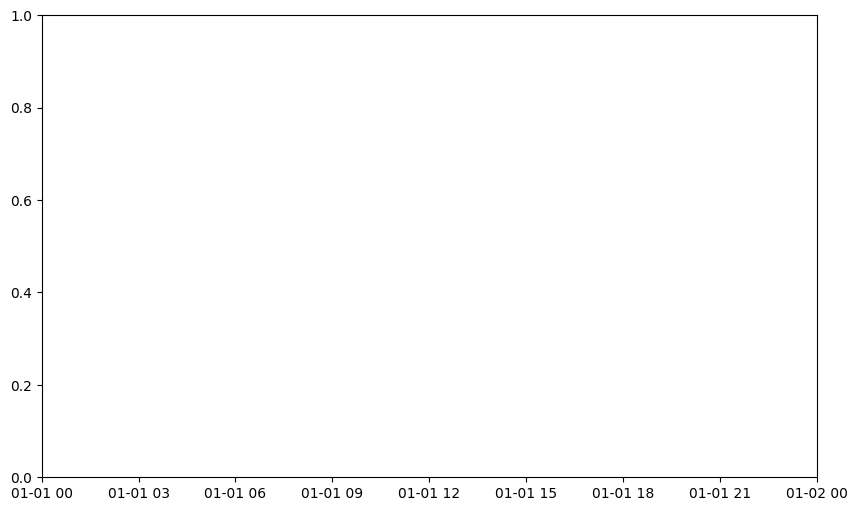

In [55]:
# Forecast the sales for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month, label='Train')
plt.plot(forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Holt-Winters Exponential Smoothing')
plt.show()

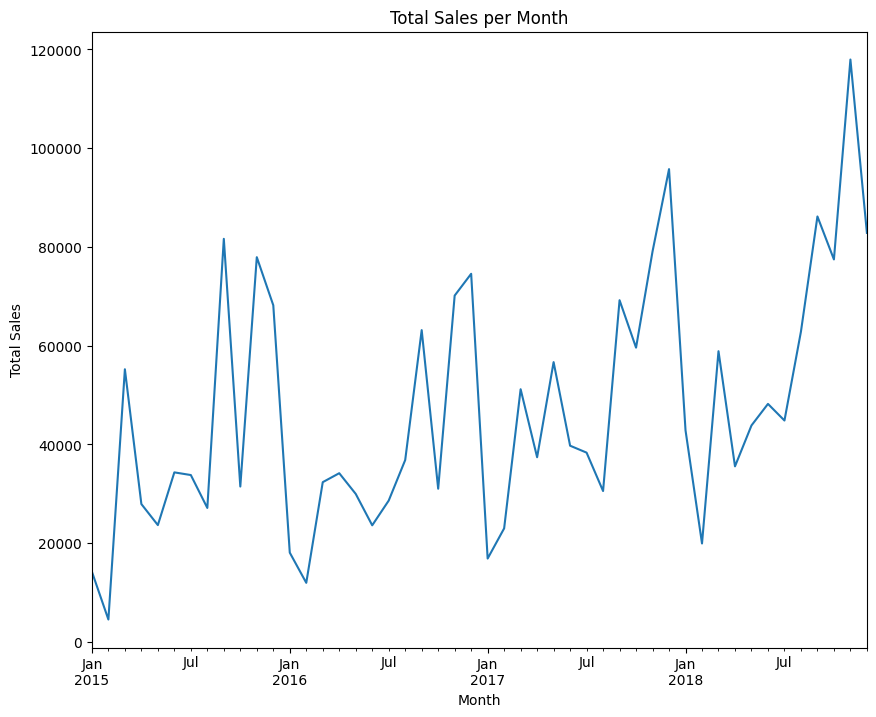

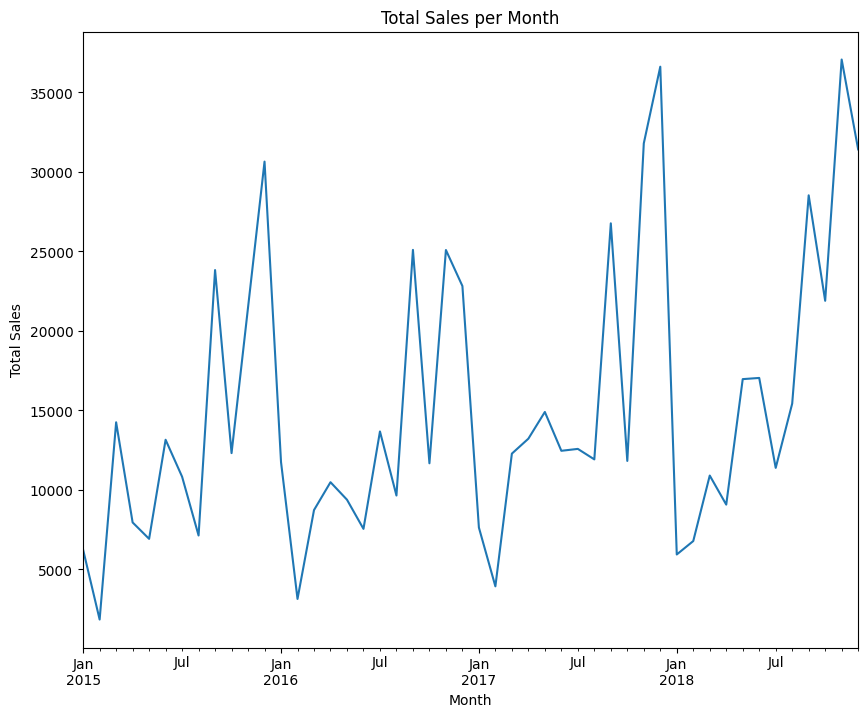

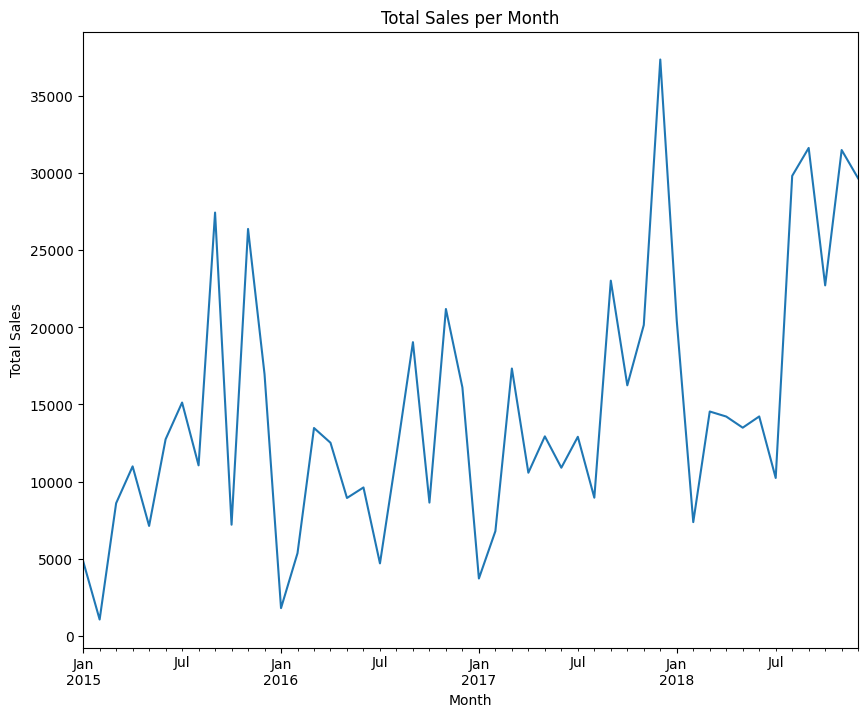

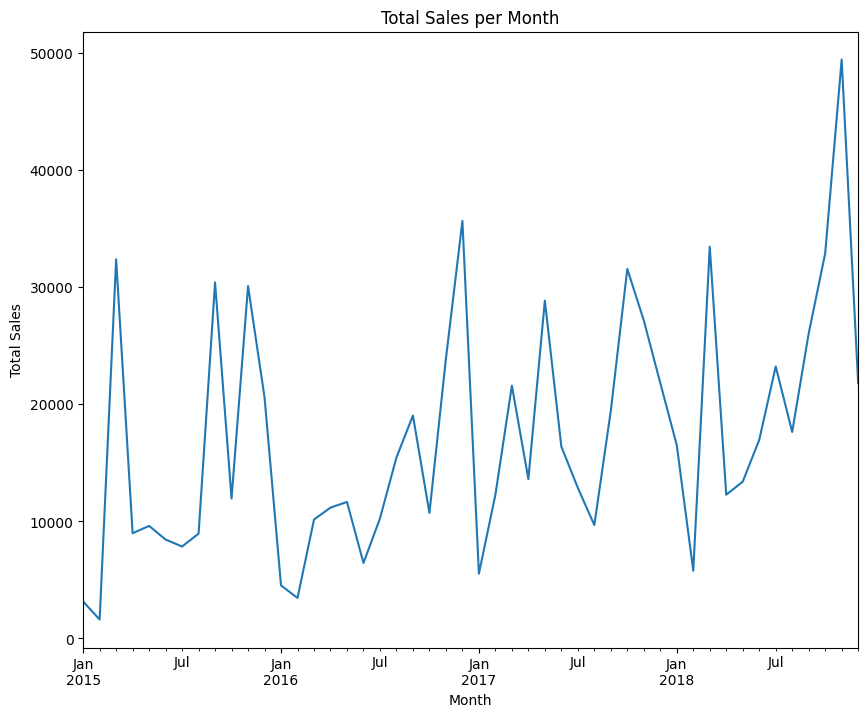

In [56]:
# df['Month'] = df['Order_Date'].dt.month
df['Month'] = df['Order_Date'].dt.to_period('M')

sales_by_month = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 8))
sales_by_month.plot(kind='line')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()




# Plot the total sales per month for each unique category
for category in df['Category'].unique():
    sales_by_month_category = df[df['Category'] == category].groupby('Month')['Sales'].sum()
    plt.figure(figsize=(10, 8))
    sales_by_month_category.plot(kind='line')
    plt.title(f'Total Sales per Month')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()

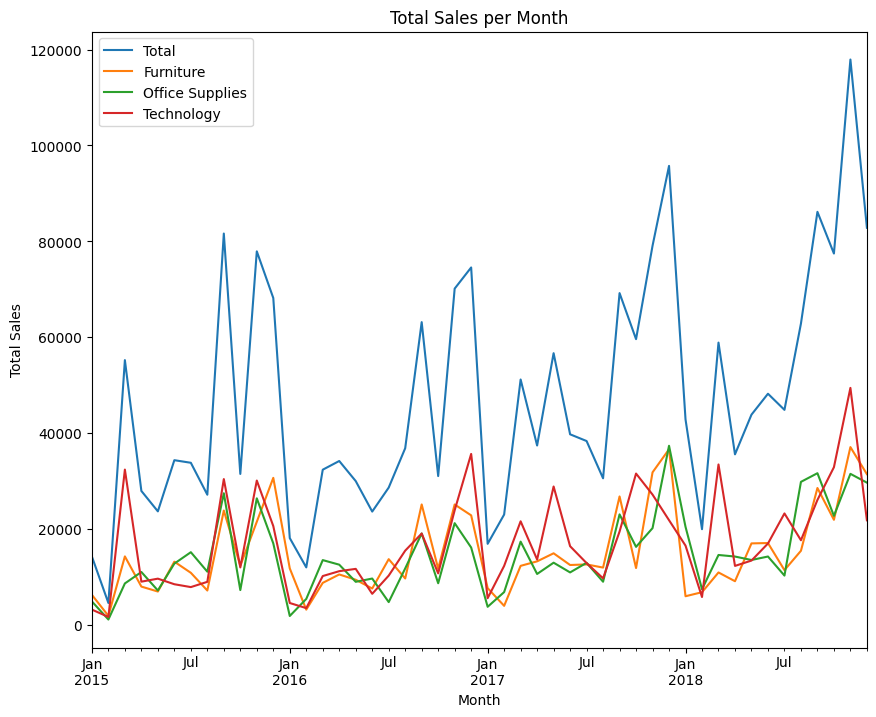

In [57]:
# df['Month'] = df['Order_Date'].dt.month
# sales_by_month = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 8))
sales_by_month.plot(kind='line',label='Total')





# Plot the total sales per month for each unique category
for category in df['Category'].unique():
    sales_by_month_category = df[df['Category'] == category].groupby('Month')['Sales'].sum()
    sales_by_month_category.plot(kind='line',label=category)
 

plt.title(f'Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


# Q2

ConversionError: Failed to convert value(s) to axis units: (datetime.date(1970, 1, 1), datetime.date(1970, 1, 2))

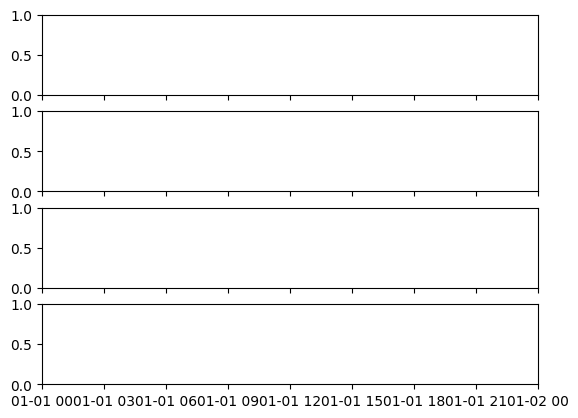

In [58]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(sales_by_month,period=12, model='additive')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

In [59]:
sales_by_month

Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     70129.2995
2016-12     74543.6012
2017-01     16870.1810
2017-02     22978.8150
2017-03     51165.0590
2017-04     37385.0170
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     42839.2940
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040
2018-

In [60]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(sales_by_month,model='additive')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [61]:
df1 =df.asfreq('MS')

# Import necessary libraries

In [62]:
df1

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date,Month,Yearmonth
1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT


In [63]:
df1 =df.asfreq('MS')
sales_by_month =df1.groupby(pd.Grouper(freq='MS'))['Sales'].sum()
# Import necessary libraries

In [64]:
sales_by_month

1970-01-01    0.0
Freq: MS, Name: Sales, dtype: float64

In [65]:
# df.isna().sum()

# #%%
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(25,10))
# sns.barplot(x='State',y='Sales',data=df)
# plt.show()


# # %%
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# categorical_cols = df.select_dtypes(include=['object']).columns

# df_cat = df[categorical_cols]
# df_num =df[numeric_cols]
# #%%
# Q1 =df_num.quantile(.25)
# Q3 =df_num.quantile(.75)
# IQR=Q3-Q1

# # %%
# outliers = ((df_num < (Q1-1.5 * IQR))| (df_num > (Q3+1.5 * IQR)))
# # %%
# print(outliers)









# # %%
# y=df['Sales']


# # %%
# df2 =df.copy()
# df2.drop(columns=['Sales'],inplace=True)

# # %%
# print(df.isnull().sum())
# df.dropna( subset=['Postal Code'],inplace=True)
# print(df.isnull().sum())
# #%%





# Q2



df.set_index('Order_Date',inplace=True)

In [66]:
monthly_sales =df['Sales'].resample('M').sum()

<ipython-input-66-11ae5f58f8e7>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales =df['Sales'].resample('M').sum()


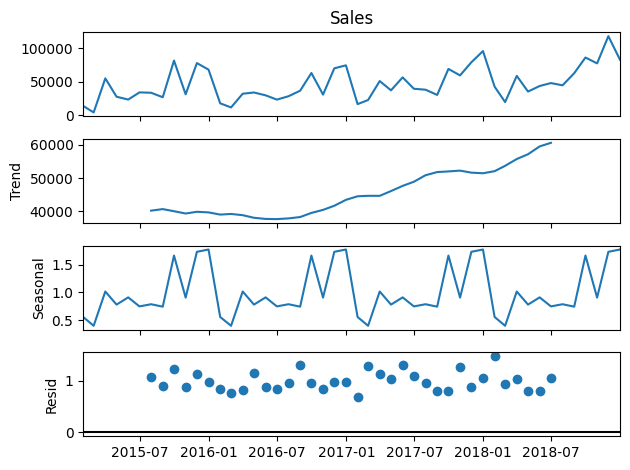

In [67]:
# a. Plot the monthly decomposition sales for trends and seasonality
result = seasonal_decompose(monthly_sales,model='multiplicative')
result.plot()
plt.show()
# The plot shows the trend, seasonal, and residual components of the sales data.

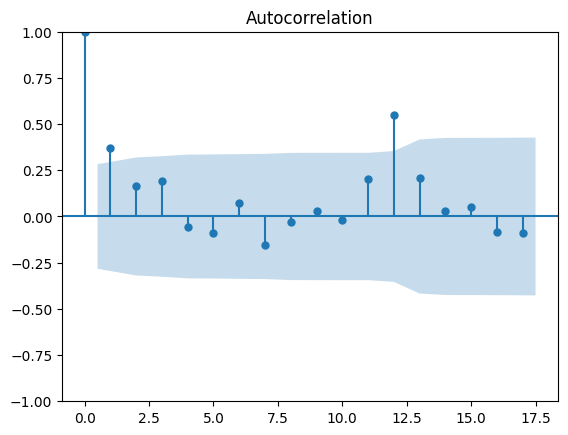

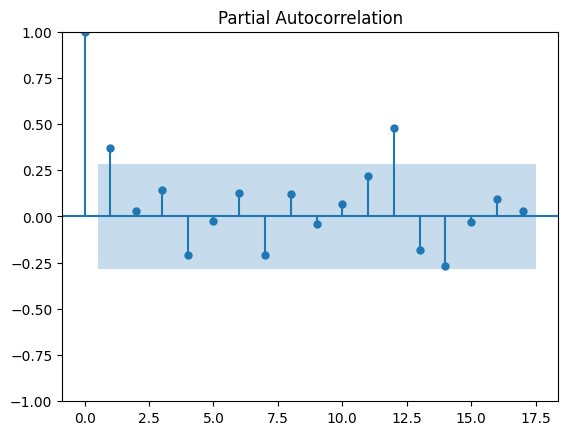

ADF Statistic: -4.424951605714013
p-value: 0.00026806297280114645


In [68]:
# b. Generate the ACF and PACF plots
plot_acf(monthly_sales)
plt.show()
# The ACF plot shows the autocorrelation of the sales data at different lags.

plot_pacf(monthly_sales)
plt.show()
# The PACF plot shows the partial autocorrelation of the sales data at different lags.

# c. Check for stationarity using the Dickey-Fuller test
result = adfuller(monthly_sales)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
# If the p-value is less than 0.05, the sales data is stationary. Otherwise, it's non-stationary.

In [69]:
# Assuming sales_by_month is your time series
# Fit the Holt-Winters exponential smoothing model
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Print the model parameters
print(model_fit.params)

# Assess the model fit/performance
print(model_fit.summary())

{'smoothing_level': np.float64(0.14642857142857144), 'smoothing_trend': np.float64(0.14642857142857144), 'smoothing_seasonal': np.float64(0.0001), 'damping_trend': nan, 'initial_level': np.float64(40685.58190361109), 'initial_trend': np.float64(-227.3932145959568), 'initial_seasons': array([-18834.325086  , -27125.55971516,   1487.60598623, -10976.24914988,
        -4384.03567905, -11452.87993738,  -8951.223686  , -11640.318636  ,
        27919.12513623,  -2871.83758183,  31760.24971956,  35069.44862928]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                     4342485012.607
Optimized:                         True   AIC                            911.385
Trend:                         Additive   BIC                            941.324
Seasonal:                

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


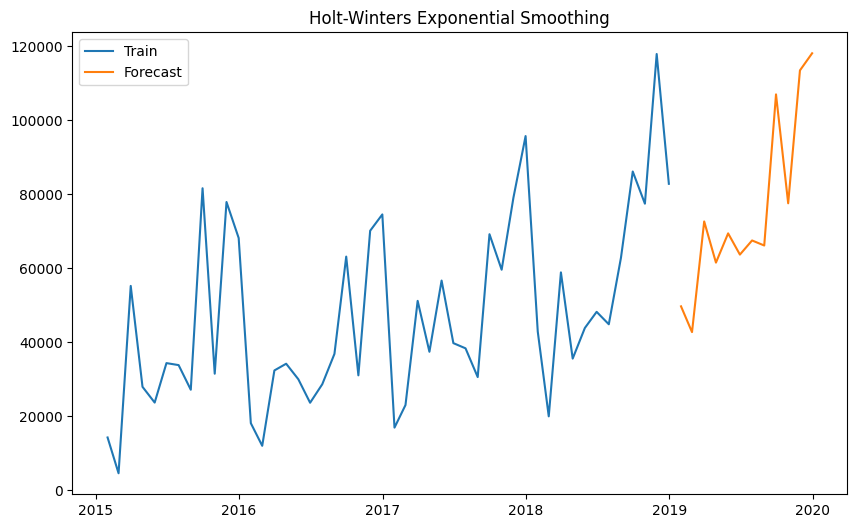

In [70]:
# Forecast the sales for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Train')
plt.plot(forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Holt-Winters Exponential Smoothing')
plt.show()

In [71]:
# Q3
# Import necessary libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [72]:
pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [73]:
train_data, test_data = train_test_split(monthly_sales,test_size=0.2,random_state=42,shuffle=False)

NameError: name 'train_test_split' is not defined

In [74]:
# Q3
# Import necessary libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [75]:
train_data, test_data = train_test_split(monthly_sales,test_size=0.2,random_state=42,shuffle=False)

In [76]:
# Assuming sales_by_month is your time series
# Fit the Holt-Winters exponential smoothing model
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Print the model parameters
print(model_fit.params)

# Assess the model fit/performance
print(model_fit.summary())

{'smoothing_level': np.float64(0.14642857142857144), 'smoothing_trend': np.float64(0.14642857142857144), 'smoothing_seasonal': np.float64(0.0001), 'damping_trend': nan, 'initial_level': np.float64(40685.58190361109), 'initial_trend': np.float64(-227.3932145959568), 'initial_seasons': array([-24769.75846615, -24939.12942865,   -464.43972656,  -6773.95867865,
          154.34125677, -12090.5083599 ,  -8297.07845781,  -7964.11087865,
        32146.13731719,  -9113.14349948,  32787.54703802,  29324.10188385]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   38
Model:             ExponentialSmoothing   SSE                     3137061808.423
Optimized:                         True   AIC                            724.701
Trend:                         Additive   BIC                            750.902
Seasonal:                

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


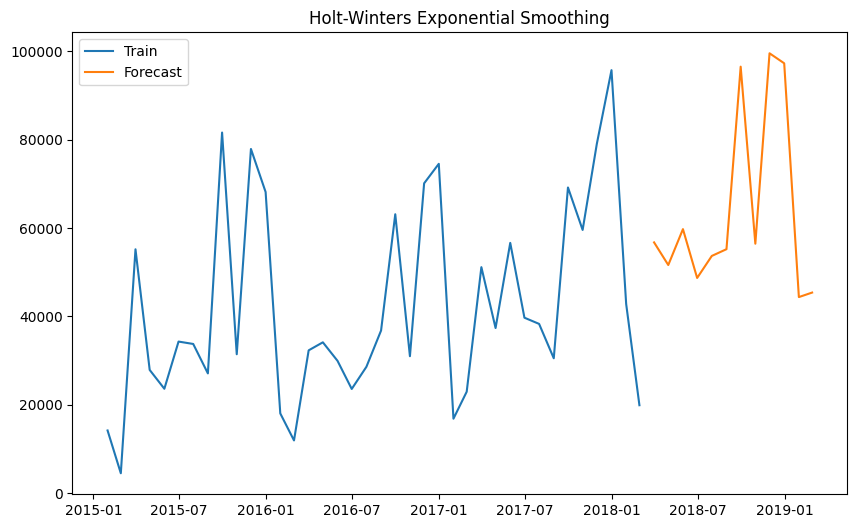

In [77]:
# Forecast the sales for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train')
plt.plot(forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Holt-Winters Exponential Smoothing')
plt.show()

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [79]:
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate error metrics
mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

In [80]:
# Print error metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 11535.97098163667
MSE: 174973791.18391433
RMSE: 13227.76591809495
MAPE: 19.043913424826716%


<ipython-input-81-5c0aaafefc44>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')
<ipython-input-81-5c0aaafefc44>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

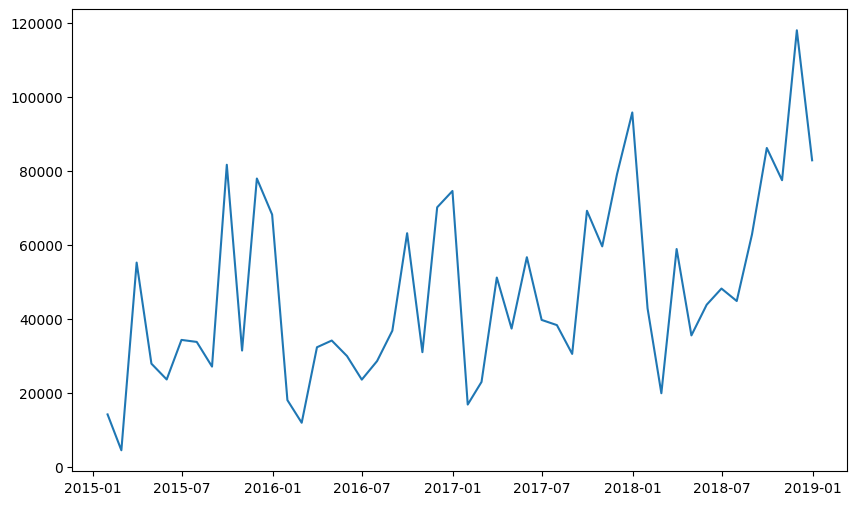

In [81]:
# Q4

import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit the AR model
model_ar = ARIMA(train_data, order=(1, 0, 0))
model_ar_fit = model_ar.fit()

# Fit the MA model
model_ma = ARIMA(train_data, order=(0, 0, 1))
model_ma_fit = model_ma.fit()

# Forecast the next 12 months with AR model
forecast_ar = model_ar_fit.forecast(steps=12)

# Forecast the next 12 months with MA model
forecast_ma = model_ma_fit.forecast(steps=12)

# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma[0], label='MA Forecast')
plt.legend()
plt.show()

<ipython-input-82-1754b044817c>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')
<ipython-input-82-1754b044817c>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

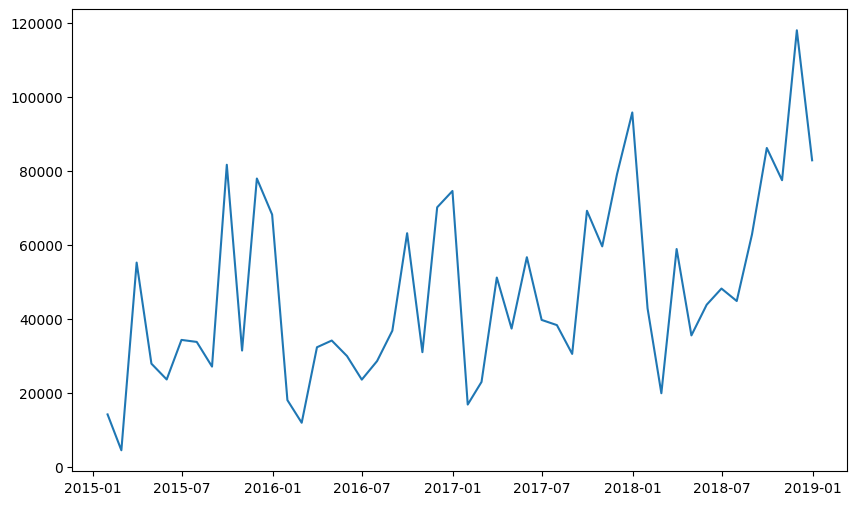

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit the AR model
model_ar = ARIMA(train_data, order=(1, 0, 0))
model_ar_fit = model_ar.fit()

# Fit the MA model
model_ma = ARIMA(train_data, order=(0, 0, 1))
model_ma_fit = model_ma.fit()

# Forecast the next 12 months with AR model
forecast_ar = model_ar_fit.forecast(steps=12)

# Forecast the next 12 months with MA model
forecast_ma = model_ma_fit.forecast(steps=12)

# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma[0], label='MA Forecast')
plt.legend()
plt.show()

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit the AR model
model_ar = ARIMA(train_data, order=(1, 0, 0))
model_ar_fit = model_ar.fit()

# Fit the MA model
model_ma = ARIMA(train_data, order=(0, 0, 1))
model_ma_fit = model_ma.fit()

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit the AR model
model_ar = ARIMA(train_data, order=(1, 0, 0))
model_ar_fit = model_ar.fit()

In [85]:
# Fit the MA model
model_ma = ARIMA(train_data, order=(0, 0, 1))
model_ma_fit = model_ma.fit()

In [86]:
# Forecast the next 12 months with AR model
forecast_ar = model_ar_fit.forecast(steps=12)

In [87]:
# Forecast the next 12 months with MA model
forecast_ma = model_ma_fit.forecast(steps=12)

In [88]:
forecast_ar

2018-03-31    36984.291474
2018-04-30    40831.559626
2018-05-31    41699.004808
2018-06-30    41894.588041
2018-07-31    41938.686276
2018-08-31    41948.629123
2018-09-30    41950.870942
2018-10-31    41951.376405
2018-11-30    41951.490372
2018-12-31    41951.516069
2019-01-31    41951.521862
2019-02-28    41951.523169
Freq: ME, Name: predicted_mean, dtype: float64

In [89]:
forecast_ma

2018-03-31    36985.506087
2018-04-30    41951.523549
2018-05-31    41951.523549
2018-06-30    41951.523549
2018-07-31    41951.523549
2018-08-31    41951.523549
2018-09-30    41951.523549
2018-10-31    41951.523549
2018-11-30    41951.523549
2018-12-31    41951.523549
2019-01-31    41951.523549
2019-02-28    41951.523549
Freq: ME, Name: predicted_mean, dtype: float64

<ipython-input-90-d76fc9c34c68>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')
<ipython-input-90-d76fc9c34c68>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

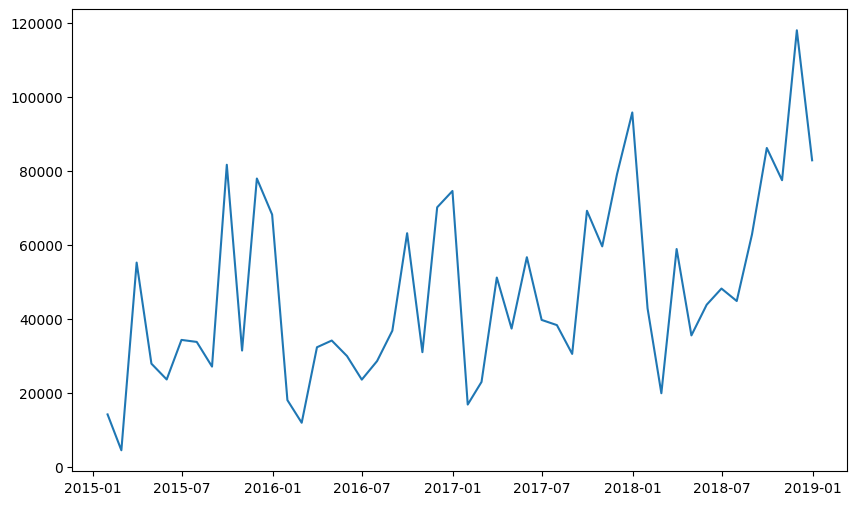

In [90]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma[0], label='MA Forecast')
plt.legend()
plt.show()

In [91]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

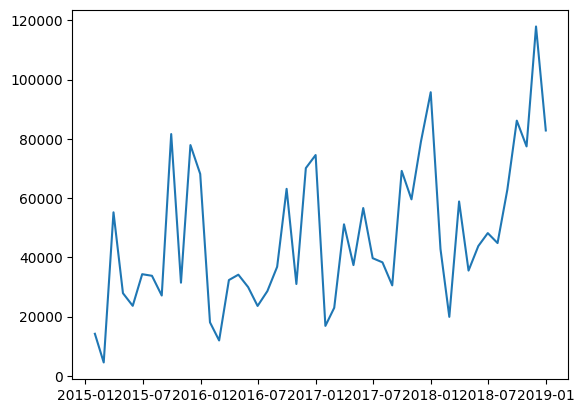

In [92]:
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')

<ipython-input-93-f6343804605c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')
<ipython-input-93-f6343804605c>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

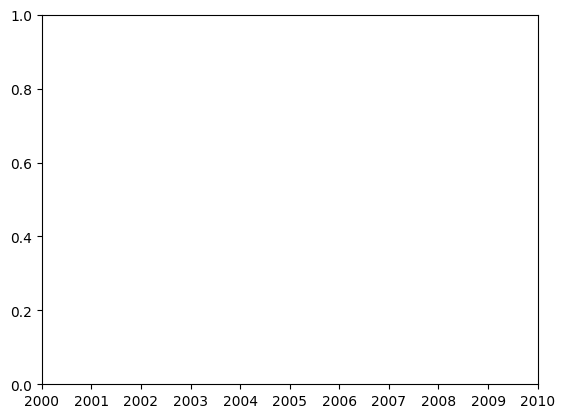

In [93]:
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')

In [94]:
model_ma_fit

In [95]:
len(forecast_ar[0])

<ipython-input-95-57da5982fc9b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  len(forecast_ar[0])


TypeError: object of type 'numpy.float64' has no len()

In [96]:
len(forecast_ma[0])

<ipython-input-96-11898e83b484>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  len(forecast_ma[0])


TypeError: object of type 'numpy.float64' has no len()

In [97]:
forecast_ar

2018-03-31    36984.291474
2018-04-30    40831.559626
2018-05-31    41699.004808
2018-06-30    41894.588041
2018-07-31    41938.686276
2018-08-31    41948.629123
2018-09-30    41950.870942
2018-10-31    41951.376405
2018-11-30    41951.490372
2018-12-31    41951.516069
2019-01-31    41951.521862
2019-02-28    41951.523169
Freq: ME, Name: predicted_mean, dtype: float64

In [98]:
forecast_ma

2018-03-31    36985.506087
2018-04-30    41951.523549
2018-05-31    41951.523549
2018-06-30    41951.523549
2018-07-31    41951.523549
2018-08-31    41951.523549
2018-09-30    41951.523549
2018-10-31    41951.523549
2018-11-30    41951.523549
2018-12-31    41951.523549
2019-01-31    41951.523549
2019-02-28    41951.523549
Freq: ME, Name: predicted_mean, dtype: float64

In [99]:
forecast_ma[0]

<ipython-input-99-375863af87c9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_ma[0]


np.float64(36985.50608720063)

In [100]:
forecast_ma[0]

<ipython-input-100-375863af87c9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_ma[0]


np.float64(36985.50608720063)

In [101]:
forecast_ar[0]

<ipython-input-101-78e792f4f0af>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_ar[0]


np.float64(36984.2914735924)

In [102]:
monthly_sales.index[-1]

Timestamp('2018-12-31 00:00:00')

<ipython-input-103-f6343804605c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')
<ipython-input-103-f6343804605c>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

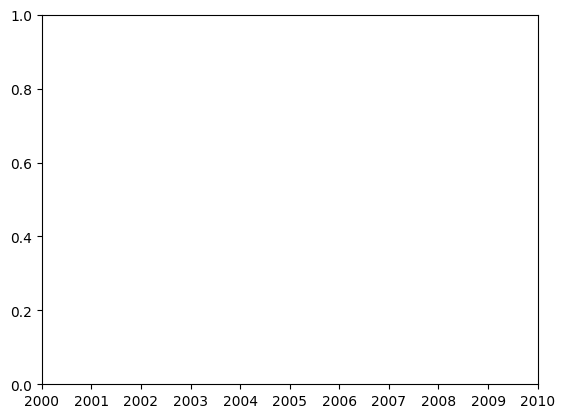

In [103]:
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar[0], label='AR Forecast')

In [104]:
# Forecast the next 12 months with AR model
forecast_ar = model_ar_fit.forecast(steps=12)[0]

<ipython-input-104-e8def3120f64>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_ar = model_ar_fit.forecast(steps=12)[0]


In [105]:
forecast_ar

np.float64(36984.2914735924)

In [106]:
# Forecast the next 12 months with AR model
forecast_ar = model_ar_fit.forecast(steps=12)

In [107]:
forecast_ar

2018-03-31    36984.291474
2018-04-30    40831.559626
2018-05-31    41699.004808
2018-06-30    41894.588041
2018-07-31    41938.686276
2018-08-31    41948.629123
2018-09-30    41950.870942
2018-10-31    41951.376405
2018-11-30    41951.490372
2018-12-31    41951.516069
2019-01-31    41951.521862
2019-02-28    41951.523169
Freq: ME, Name: predicted_mean, dtype: float64

<ipython-input-108-a883cd1c5fc6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-108-a883cd1c5fc6>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


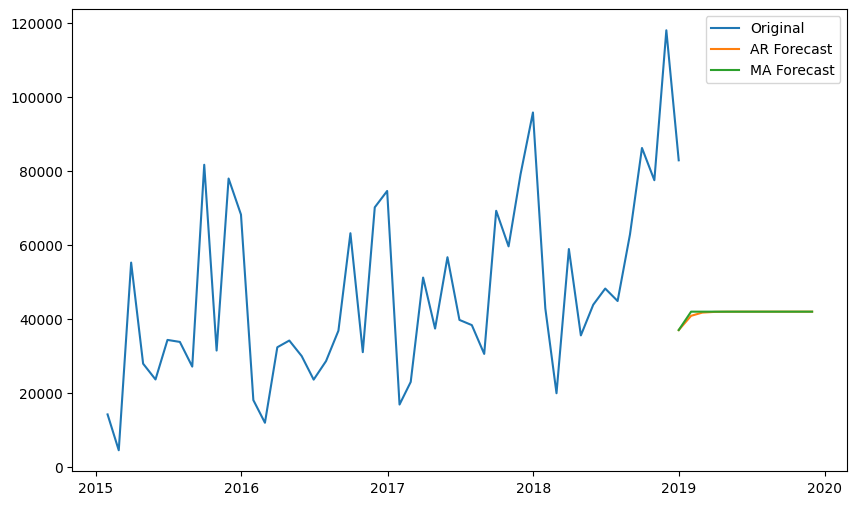

In [108]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

<ipython-input-109-c63850418d14>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-109-c63850418d14>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


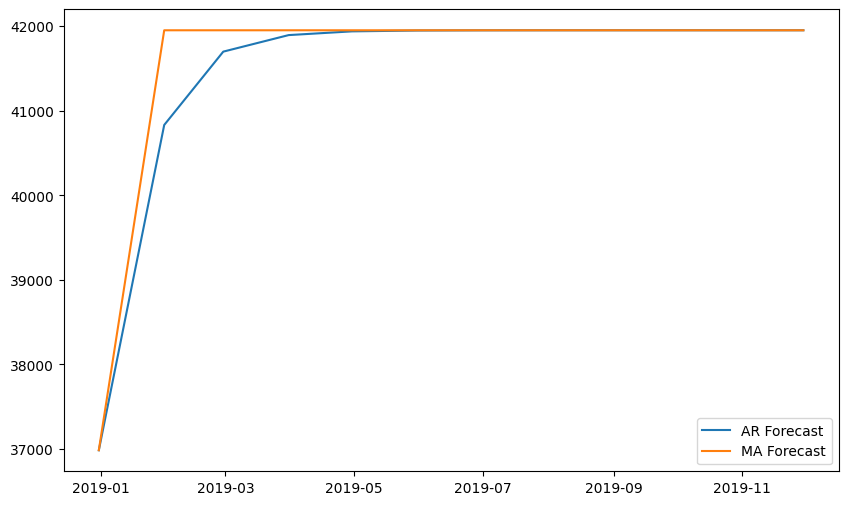

In [109]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
# plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

In [110]:
train_data

Order_Date
2015-01-31    14205.7070
2015-02-28     4519.8920
2015-03-31    55205.7970
2015-04-30    27906.8550
2015-05-31    23644.3030
2015-06-30    34322.9356
2015-07-31    33781.5430
2015-08-31    27117.5365
2015-09-30    81623.5268
2015-10-31    31453.3930
2015-11-30    77907.6607
2015-12-31    68167.0585
2016-01-31    18066.9576
2016-02-29    11951.4110
2016-03-31    32339.3184
2016-04-30    34154.4685
2016-05-31    29959.5305
2016-06-30    23599.3740
2016-07-31    28608.2590
2016-08-31    36818.3422
2016-09-30    63133.6060
2016-10-31    31011.7375
2016-11-30    70129.2995
2016-12-31    74543.6012
2017-01-31    16870.1810
2017-02-28    22978.8150
2017-03-31    51165.0590
2017-04-30    37385.0170
2017-05-31    56656.9080
2017-06-30    39724.4860
2017-07-31    38320.7830
2017-08-31    30542.2003
2017-09-30    69193.3909
2017-10-31    59583.0330
2017-11-30    79066.4958
2017-12-31    95739.1210
2018-01-31    42839.2940
2018-02-28    19920.9974
Freq: ME, Name: Sales, dtype: float64

In [111]:
monthly_sales

Order_Date
2015-01-31     14205.7070
2015-02-28      4519.8920
2015-03-31     55205.7970
2015-04-30     27906.8550
2015-05-31     23644.3030
2015-06-30     34322.9356
2015-07-31     33781.5430
2015-08-31     27117.5365
2015-09-30     81623.5268
2015-10-31     31453.3930
2015-11-30     77907.6607
2015-12-31     68167.0585
2016-01-31     18066.9576
2016-02-29     11951.4110
2016-03-31     32339.3184
2016-04-30     34154.4685
2016-05-31     29959.5305
2016-06-30     23599.3740
2016-07-31     28608.2590
2016-08-31     36818.3422
2016-09-30     63133.6060
2016-10-31     31011.7375
2016-11-30     70129.2995
2016-12-31     74543.6012
2017-01-31     16870.1810
2017-02-28     22978.8150
2017-03-31     51165.0590
2017-04-30     37385.0170
2017-05-31     56656.9080
2017-06-30     39724.4860
2017-07-31     38320.7830
2017-08-31     30542.2003
2017-09-30     69193.3909
2017-10-31     59583.0330
2017-11-30     79066.4958
2017-12-31     95739.1210
2018-01-31     42839.2940
2018-02-28     19920.9974
2

In [112]:
train_data

Order_Date
2015-01-31    14205.7070
2015-02-28     4519.8920
2015-03-31    55205.7970
2015-04-30    27906.8550
2015-05-31    23644.3030
2015-06-30    34322.9356
2015-07-31    33781.5430
2015-08-31    27117.5365
2015-09-30    81623.5268
2015-10-31    31453.3930
2015-11-30    77907.6607
2015-12-31    68167.0585
2016-01-31    18066.9576
2016-02-29    11951.4110
2016-03-31    32339.3184
2016-04-30    34154.4685
2016-05-31    29959.5305
2016-06-30    23599.3740
2016-07-31    28608.2590
2016-08-31    36818.3422
2016-09-30    63133.6060
2016-10-31    31011.7375
2016-11-30    70129.2995
2016-12-31    74543.6012
2017-01-31    16870.1810
2017-02-28    22978.8150
2017-03-31    51165.0590
2017-04-30    37385.0170
2017-05-31    56656.9080
2017-06-30    39724.4860
2017-07-31    38320.7830
2017-08-31    30542.2003
2017-09-30    69193.3909
2017-10-31    59583.0330
2017-11-30    79066.4958
2017-12-31    95739.1210
2018-01-31    42839.2940
2018-02-28    19920.9974
Freq: ME, Name: Sales, dtype: float64

<ipython-input-113-c63850418d14>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-113-c63850418d14>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


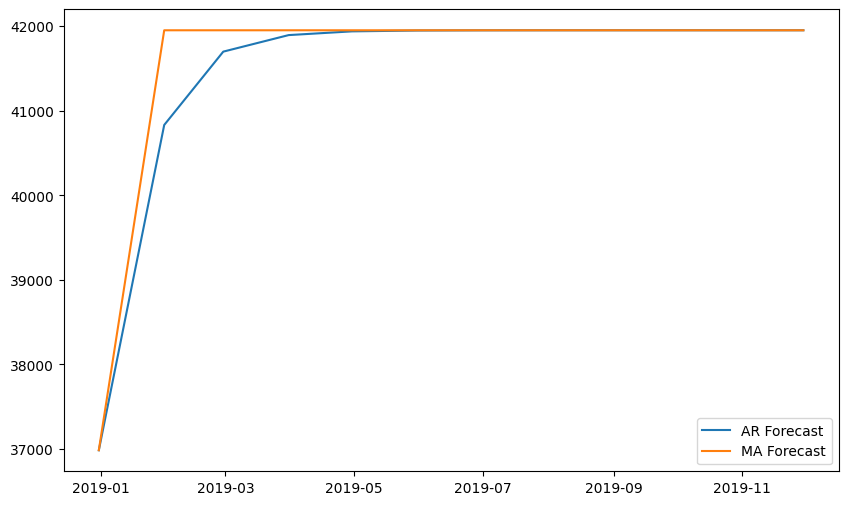

In [113]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
# plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

<ipython-input-114-a883cd1c5fc6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-114-a883cd1c5fc6>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


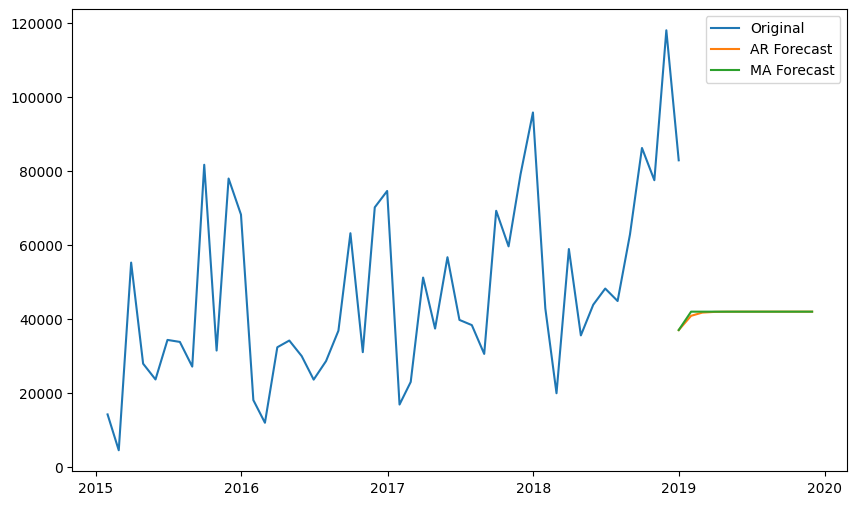

In [114]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

<ipython-input-115-830525e6e5f3>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-115-830525e6e5f3>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


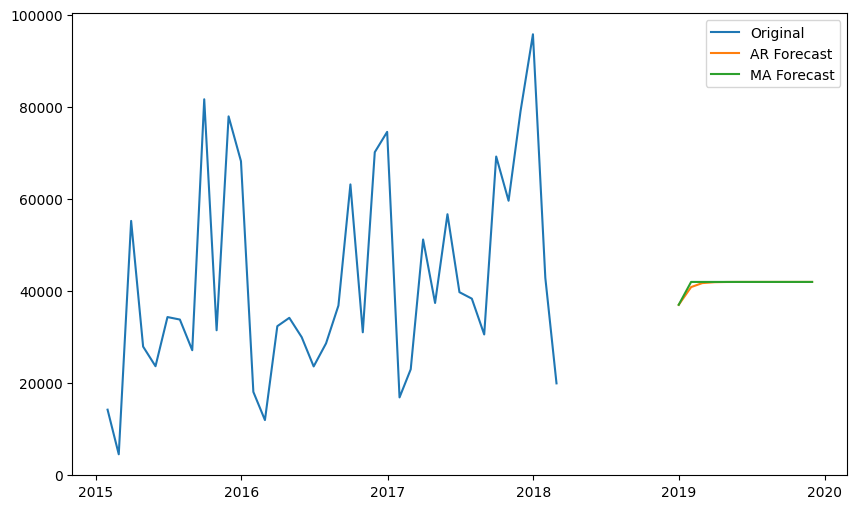

In [115]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

In [116]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-116-7bfd99219a4e>, line 5)

<ipython-input-117-fc02c3574cca>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index, periods=12, freq='M'), forecast_ar, label='AR Forecast')


TypeError: Cannot convert input [DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Order_Date', freq='ME')] of type <class 'pandas.core.indexes.datetimes.DatetimeIndex'> to Timestamp

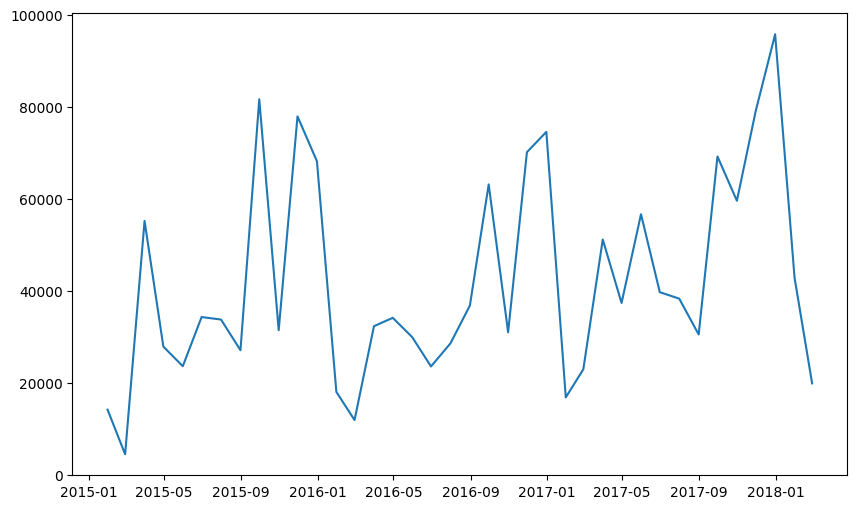

In [117]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index, periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

<ipython-input-118-683d3834a32d>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index, periods=12, freq='M'), forecast_ar, label='AR Forecast')


TypeError: Cannot convert input [DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Order_Date', freq='ME')] of type <class 'pandas.core.indexes.datetimes.DatetimeIndex'> to Timestamp

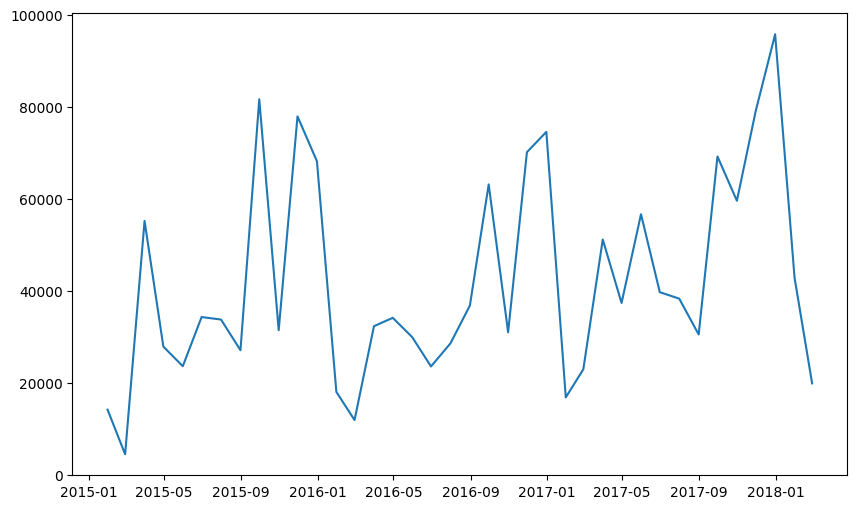

In [118]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index, periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index, periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

In [119]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
# plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index, periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index, periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

<ipython-input-119-8ac6f76294c3>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index, periods=12, freq='M'), forecast_ar, label='AR Forecast')


TypeError: Cannot convert input [DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Order_Date', freq='ME')] of type <class 'pandas.core.indexes.datetimes.DatetimeIndex'> to Timestamp

<Figure size 1000x600 with 0 Axes>

In [120]:
-1]

SyntaxError: unmatched ']' (<ipython-input-120-5e85a6938a46>, line 1)

<ipython-input-121-830525e6e5f3>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-121-830525e6e5f3>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


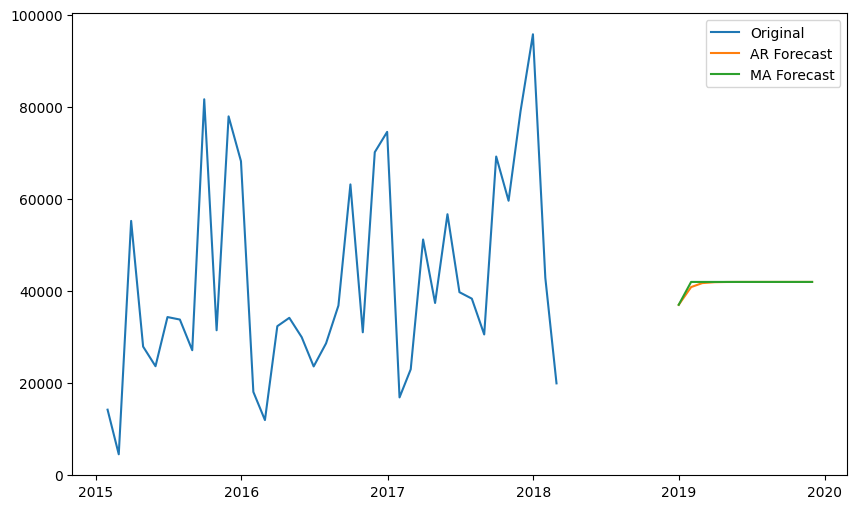

In [121]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit the AR model
model_ar = ARIMA(monthly_sales, order=(1, 0, 0))
model_ar_fit = model_ar.fit()

In [123]:
# Fit the MA model
model_ma = ARIMA(monthly_sales, order=(0, 0, 1))
model_ma_fit = model_ma.fit()

In [124]:
# Forecast the next 12 months with AR model
forecast_ar = model_ar_fit.forecast(steps=12)

In [125]:
# Forecast the next 12 months with MA model
forecast_ma = model_ma_fit.forecast(steps=12)

In [126]:
len(forecast_ma[0])

<ipython-input-126-11898e83b484>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  len(forecast_ma[0])


TypeError: object of type 'numpy.float64' has no len()

<ipython-input-127-830525e6e5f3>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-127-830525e6e5f3>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


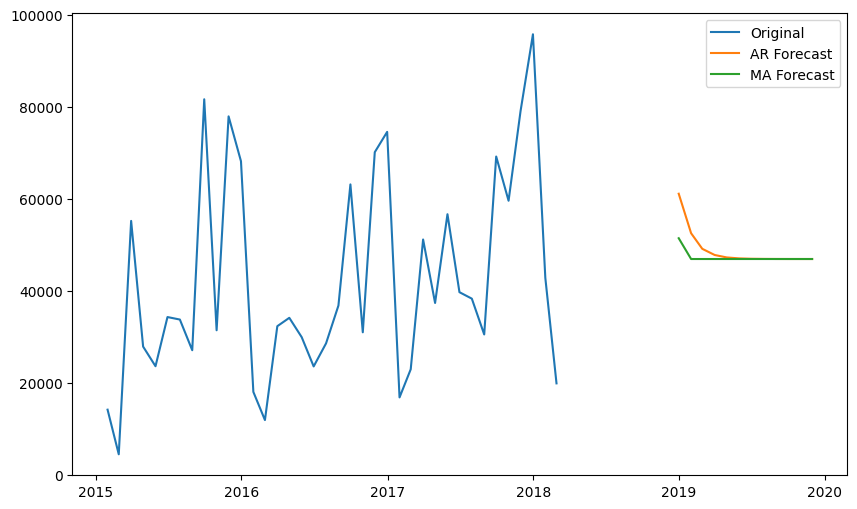

In [127]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

<ipython-input-128-a883cd1c5fc6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-128-a883cd1c5fc6>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


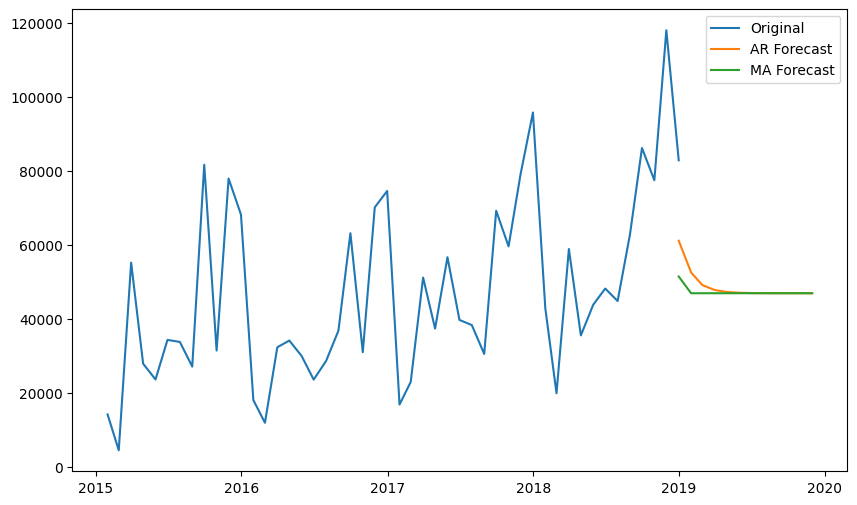

In [128]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit the AR model
model_ar = ARIMA(train_data, order=(1, 0, 0))
model_ar_fit = model_ar.fit()

In [130]:
# Fit the MA model
model_ma = ARIMA(train_data, order=(0, 0, 1))
model_ma_fit = model_ma.fit()

In [131]:
# Forecast the next 12 months with AR model
forecast_ar = model_ar_fit.forecast(steps=12)

In [132]:
# Forecast the next 12 months with MA model
forecast_ma = model_ma_fit.forecast(steps=12)

<ipython-input-133-830525e6e5f3>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-133-830525e6e5f3>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


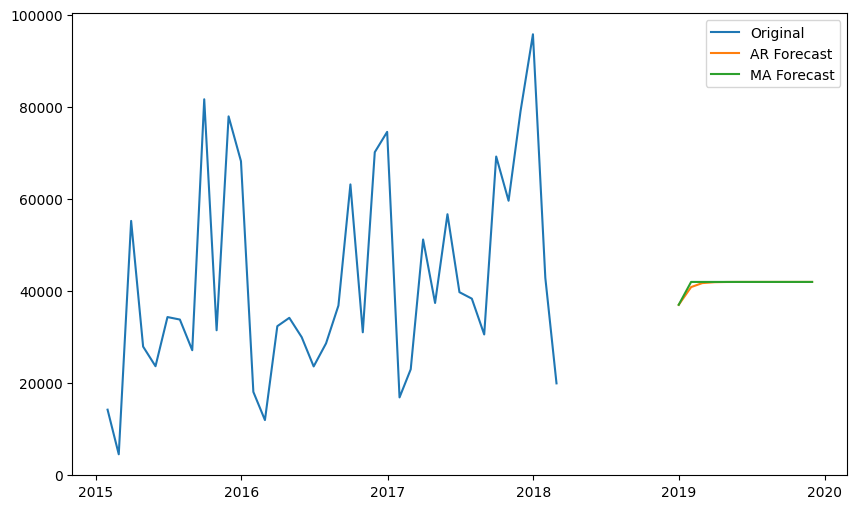

In [133]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

<ipython-input-134-62f0613ac12a>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
<ipython-input-134-62f0613ac12a>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')


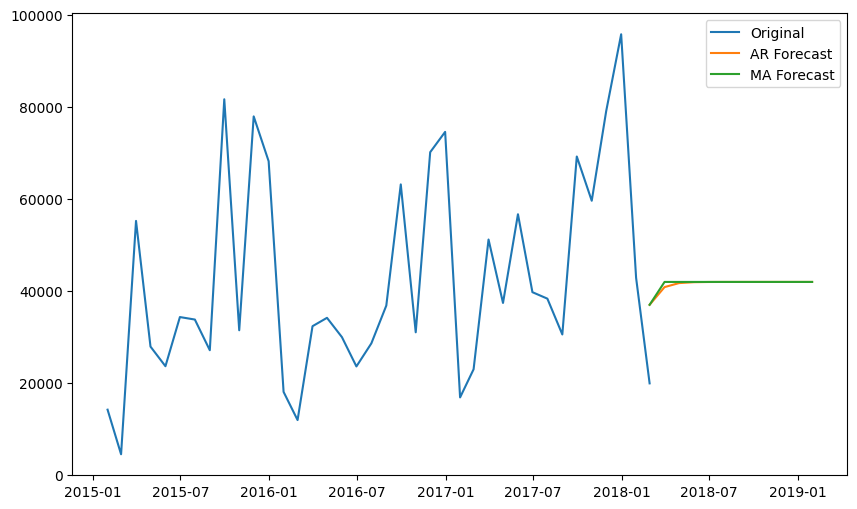

In [134]:
# Plot the original data, the AR forecast, and the MA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_ar, label='AR Forecast')
plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_ma, label='MA Forecast')
plt.legend()
plt.show()

In [135]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Define the ARIMA model
model_arima = ARIMA(monthly_sales, order=(1, 1, 1))

# Fit the ARIMA model
model_arima_fit = model_arima.fit(disp=False)

# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

TypeError: ARIMA.fit() got an unexpected keyword argument 'disp'

In [136]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Define the ARIMA model
model_arima = ARIMA(train_data, order=(1, 1, 1))

# Fit the ARIMA model
model_arima_fit = model_arima.fit(disp=False)

# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

TypeError: ARIMA.fit() got an unexpected keyword argument 'disp'

In [137]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Define the ARIMA model
model_arima = ARIMA(train_data, order=(1, 1, 1))

# Fit the ARIMA model
model_arima_fit = model_arima.fit(disp=False)

TypeError: ARIMA.fit() got an unexpected keyword argument 'disp'

In [138]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Define the ARIMA model
model_arima = ARIMA(train_data, order=(1, 1, 1))

# Fit the ARIMA model
model_arima_fit = model_arima.fit()

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-139-b7a6e9c902da>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
<ipython-input-139-b7a6e9c902da>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

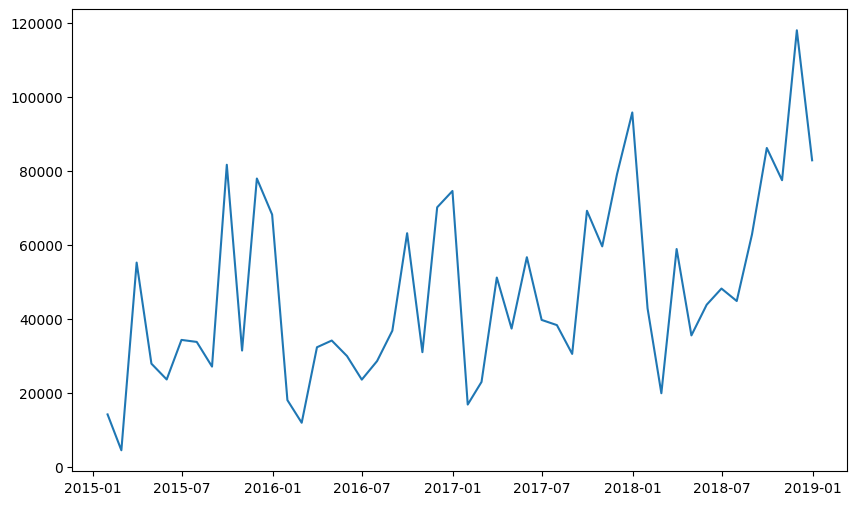

In [139]:
# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.17191D+00    |proj g|=  5.26250D-01

At iterate    5    f=  8.01857D+00    |proj g|=  1.97596D-02

At iterate   10    f=  8.00494D+00    |proj g|=  1.80895D-02

At iterate   15    f=  8.00234D+00    |proj g|=  1.30251D-03

At iterate   20    f=  8.00231D+00    |proj g|=  7.92220D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   7.922D-06   8.002D+00
  F =   8.0023094381359616     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
<ipython-input-140-1d5d0c108bd0>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
<ipython-input-140-1d5d0c108bd0>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='A

ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

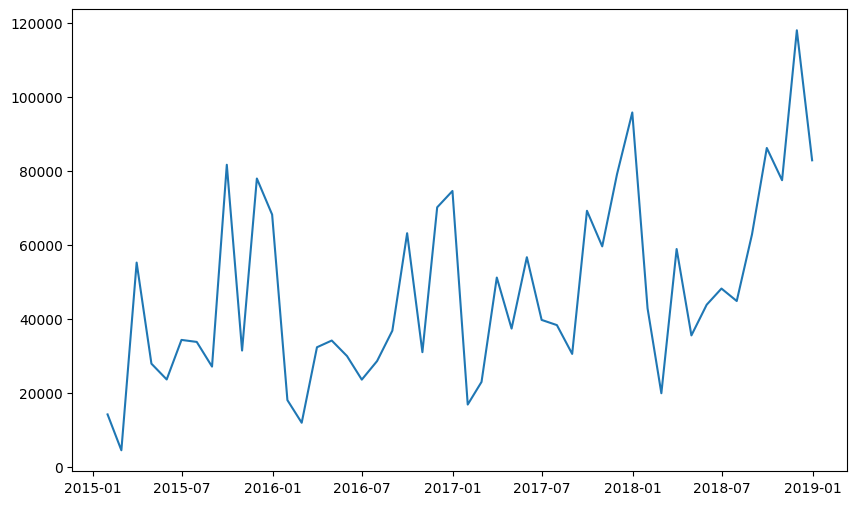

In [140]:
# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49592D+00    |proj g|=  8.37982D-01

At iterate    5    f=  7.18442D+00    |proj g|=  3.15614D-02

At iterate   10    f=  7.17961D+00    |proj g|=  1.06932D-02

At iterate   15    f=  7.17396D+00    |proj g|=  9.40325D-03

At iterate   20    f=  7.17321D+00    |proj g|=  1.30934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   4.989D-06   7.173D+00
  F =   7.1732135035844307     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
<ipython-input-141-92441c6cadaf>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
<ipython-input-141-92441c6cadaf>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='A

ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

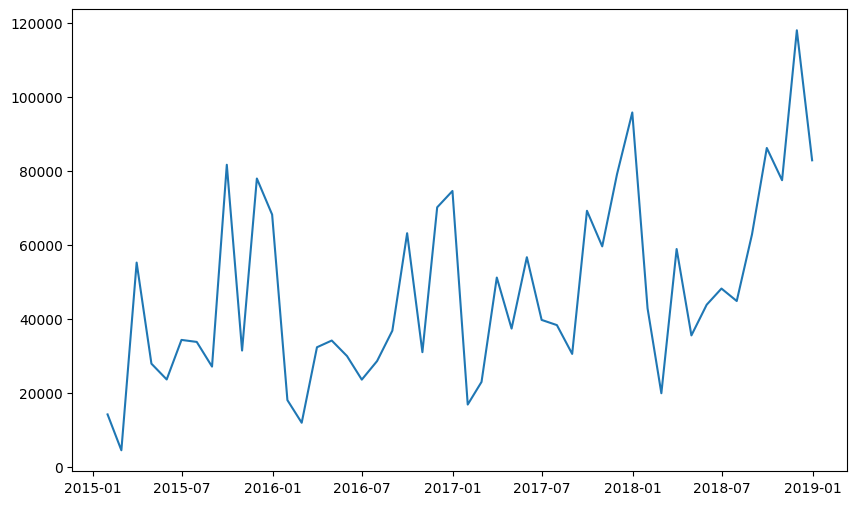

In [141]:
# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49592D+00    |proj g|=  8.37982D-01

At iterate    5    f=  7.18442D+00    |proj g|=  3.15614D-02

At iterate   10    f=  7.17961D+00    |proj g|=  1.06932D-02

At iterate   15    f=  7.17396D+00    |proj g|=  9.40325D-03

At iterate   20    f=  7.17321D+00    |proj g|=  1.30934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   4.989D-06   7.173D+00
  F =   7.1732135035844307     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
<ipython-input-142-0d53841b3d3d>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
<ipython-input-142-0d53841b3d3d>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')


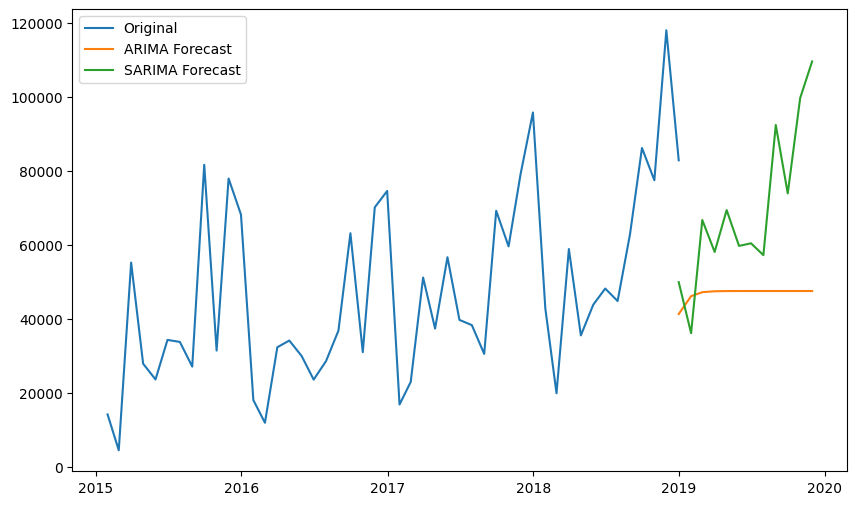

In [142]:
# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

<ipython-input-143-0c6656eafc0a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')


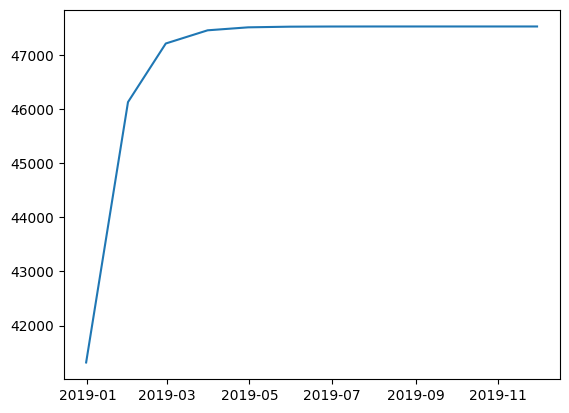

In [143]:
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')

<ipython-input-144-0fa5352e7ac9>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')


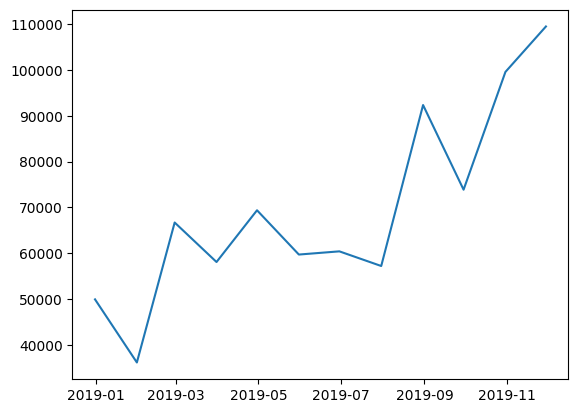

In [144]:
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.17191D+00    |proj g|=  5.26250D-01

At iterate    5    f=  8.01857D+00    |proj g|=  1.97596D-02

At iterate   10    f=  8.00494D+00    |proj g|=  1.80895D-02

At iterate   15    f=  8.00234D+00    |proj g|=  1.30251D-03

At iterate   20    f=  8.00231D+00    |proj g|=  7.92220D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   7.922D-06   8.002D+00
  F =   8.0023094381359616     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
<ipython-input-145-a0f6daca8176>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
<ipython-input-145-a0f6daca8176>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')


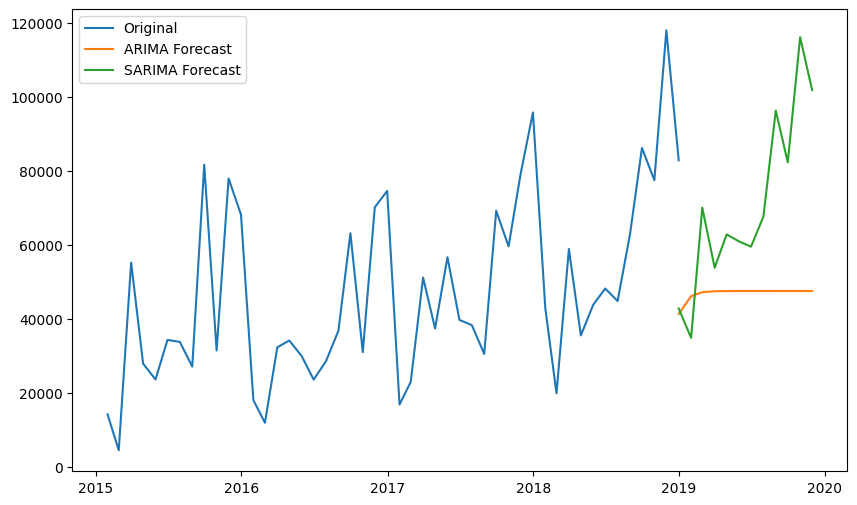

In [145]:
# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49592D+00    |proj g|=  8.37982D-01

At iterate    5    f=  7.18442D+00    |proj g|=  3.15614D-02

At iterate   10    f=  7.17961D+00    |proj g|=  1.06932D-02

At iterate   15    f=  7.17396D+00    |proj g|=  9.40325D-03

At iterate   20    f=  7.17321D+00    |proj g|=  1.30934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   4.989D-06   7.173D+00
  F =   7.1732135035844307     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
<ipython-input-146-c36d5b217e8c>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
<ipython-input-146-c36d5b217e8c>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')


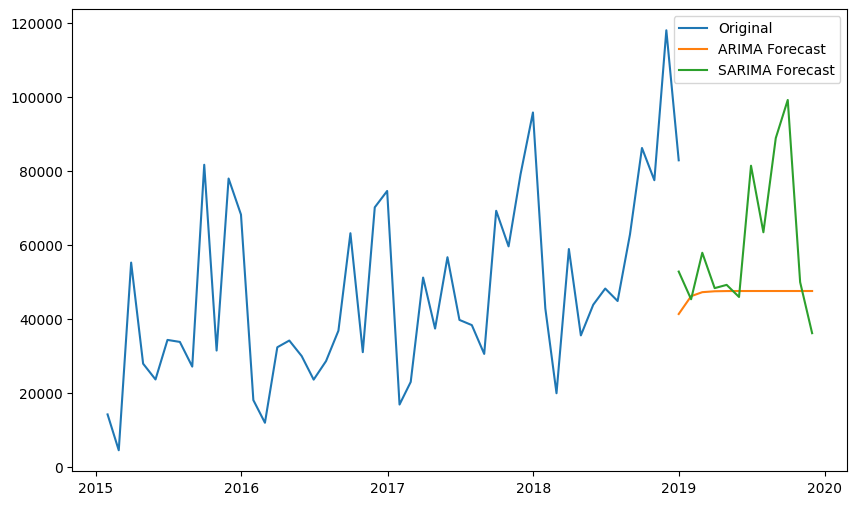

In [146]:
# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(train_data), len(train_data) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49592D+00    |proj g|=  8.37982D-01

At iterate    5    f=  7.18442D+00    |proj g|=  3.15614D-02

At iterate   10    f=  7.17961D+00    |proj g|=  1.06932D-02

At iterate   15    f=  7.17396D+00    |proj g|=  9.40325D-03

At iterate   20    f=  7.17321D+00    |proj g|=  1.30934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   4.989D-06   7.173D+00
  F =   7.1732135035844307     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
<ipython-input-147-a8c39af679ed>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
<ipython-input-147-a8c39af679ed>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')


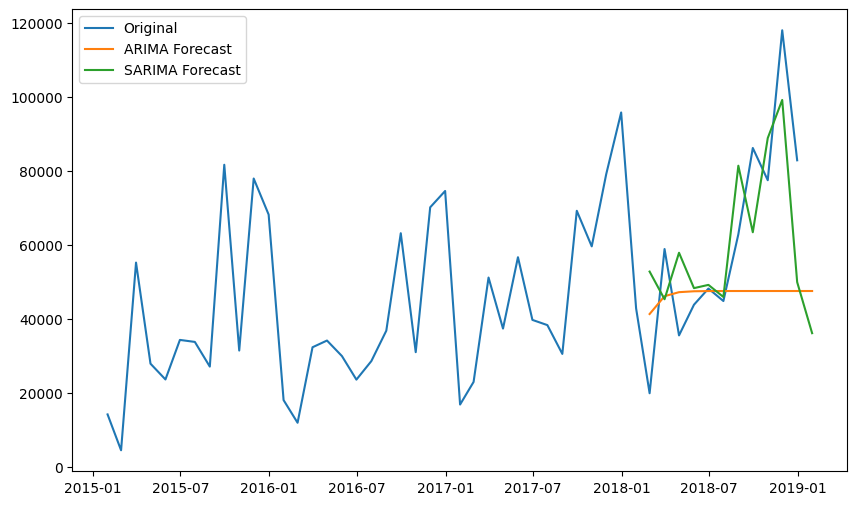

In [147]:
# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(train_data), len(train_data) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49592D+00    |proj g|=  8.37982D-01

At iterate    5    f=  7.18442D+00    |proj g|=  3.15614D-02

At iterate   10    f=  7.17961D+00    |proj g|=  1.06932D-02

At iterate   15    f=  7.17396D+00    |proj g|=  9.40325D-03

At iterate   20    f=  7.17321D+00    |proj g|=  1.30934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   4.989D-06   7.173D+00
  F =   7.1732135035844307     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
<ipython-input-148-a11996c57e56>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
<ipython-input-148-a11996c57e56>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')


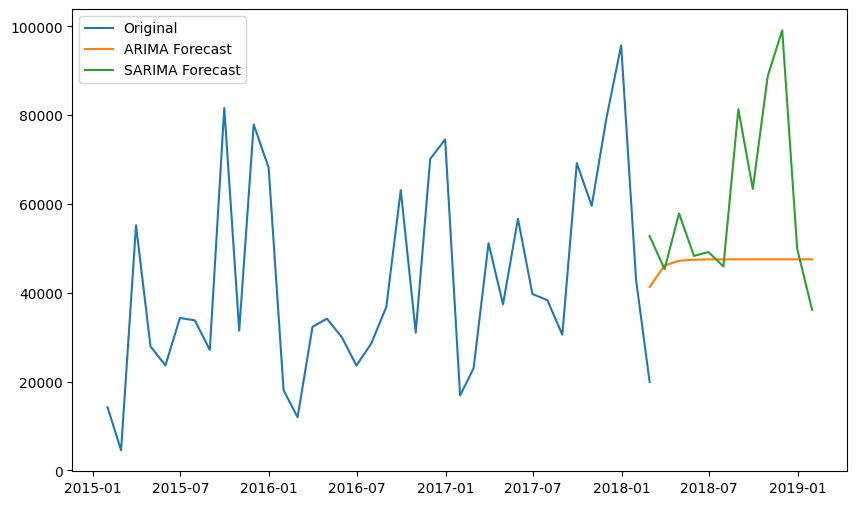

In [148]:
# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(train_data), len(train_data) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Original')
plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
plt.plot(pd.date_range(train_data.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

In [149]:
# Define the ARIMA model
model_arima = ARIMA(monthly_sales, order=(1, 1, 1))

# Fit the ARIMA model
model_arima_fit = model_arima.fit(disp=False)


# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima[0], label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

TypeError: ARIMA.fit() got an unexpected keyword argument 'disp'

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.17191D+00    |proj g|=  5.26250D-01

At iterate    5    f=  8.01857D+00    |proj g|=  1.97596D-02

At iterate   10    f=  8.00494D+00    |proj g|=  1.80895D-02

At iterate   15    f=  8.00234D+00    |proj g|=  1.30251D-03

At iterate   20    f=  8.00231D+00    |proj g|=  7.92220D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   7.922D-06   8.002D+00
  F =   8.0023094381359616     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
<ipython-input-150-4c55f0b6489a>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
<ipython-input-150-4c55f0b6489a>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')


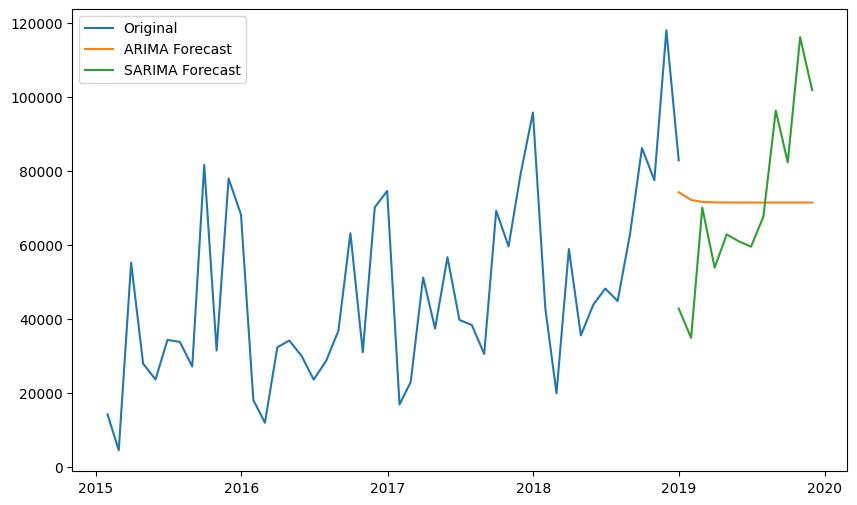

In [150]:
# Define the ARIMA model
model_arima = ARIMA(monthly_sales, order=(1, 1, 1))

# Fit the ARIMA model
model_arima_fit = model_arima.fit()


# Forecast the next 12 months with ARIMA model
forecast_arima = model_arima_fit.forecast(steps=12)

# Define the SARIMA model
model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast the next 12 months with SARIMA model
forecast_sarima = model_sarima_fit.predict(len(monthly_sales), len(monthly_sales) + 11)

# Plot the original data, the ARIMA forecast, and the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Original')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_arima, label='ARIMA Forecast')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq='M'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()

In [151]:
# Forecast the next 12 months with each model
forecast_ar = model_ar_fit.forecast(steps=12)[0]
forecast_ma = model_ma_fit.forecast(steps=12)[0]
forecast_arima = model_arima_fit.forecast(steps=12)[0]
forecast_sarima = model_sarima_fit.forecast(steps=12)
forecast_holt_winters = model_fit.forecast(steps=12)

# Calculate and print the MAE and RMSE for each model
models = ['AR', 'MA', 'ARIMA', 'SARIMA', 'Holt-Winters']
forecasts = [forecast_ar, forecast_ma, forecast_arima, forecast_sarima, forecast_holt_winters]

for model, forecast in zip(models, forecasts):
    mae = mean_absolute_error(monthly_sales[-12:], forecast)
    rmse = np.sqrt(mean_squared_error(monthly_sales[-12:], forecast))
    print(f"{model} Model: MAE = {mae}, RMSE = {rmse}")

<ipython-input-151-fbb35d24b2bc>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_ar = model_ar_fit.forecast(steps=12)[0]
<ipython-input-151-fbb35d24b2bc>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_ma = model_ma_fit.forecast(steps=12)[0]
<ipython-input-151-fbb35d24b2bc>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_arima = model_arima_fit.forecast(steps=12)[0]


InvalidParameterError: The 'y_pred' parameter of mean_absolute_error must be an array-like. Got np.float64(36984.2914735924) instead.

In [152]:
# Forecast the next 12 months with each model
forecast_ar = model_ar_fit.forecast(steps=12)
forecast_ma = model_ma_fit.forecast(steps=12)
forecast_arima = model_arima_fit.forecast(steps=12)
forecast_sarima = model_sarima_fit.forecast(steps=12)
forecast_holt_winters = model_fit.forecast(steps=12)

# Calculate and print the MAE and RMSE for each model
models = ['AR', 'MA', 'ARIMA', 'SARIMA', 'Holt-Winters']
forecasts = [forecast_ar, forecast_ma, forecast_arima, forecast_sarima, forecast_holt_winters]

for model, forecast in zip(models, forecasts):
    mae = mean_absolute_error(monthly_sales[-12:], forecast)
    rmse = np.sqrt(mean_squared_error(monthly_sales[-12:], forecast))
    print(f"{model} Model: MAE = {mae}, RMSE = {rmse}")

AR Model: MAE = 23227.602613963874, RMSE = 31559.401360340355
MA Model: MAE = 23303.151939346033, RMSE = 31612.30203165566
ARIMA Model: MAE = 24744.050978579788, RMSE = 28565.283773541887
SARIMA Model: MAE = 10947.457602954315, RMSE = 12686.68152635789
Holt-Winters Model: MAE = 23244.156475544147, RMSE = 31116.129719242977


In [153]:
# Fit the models and make forecasts
forecasts = {}
for name, model in models.items():
    model_fit = model.fit(disp=False)
    forecasts[name] = model_fit.forecast(steps=len(test_data))

# Calculate and print the MAE and RMSE for each model
for name, forecast in forecasts.items():
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    print(f"{name} Model: MAE = {mae}, RMSE = {rmse}")

AttributeError: 'list' object has no attribute 'items'

In [154]:
# Fit the models and make forecasts
models = {
    'AR': ARIMA(train_data, order=(1, 0, 0)),
    'MA': ARIMA(train_data, order=(0, 0, 1)),
    'ARIMA': ARIMA(train_data, order=(1, 1, 1)),
    'SARIMA': SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)),
    'Holt-Winters': ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
}
forecasts = {}
for name, model in models.items():
    model_fit = model.fit(disp=False)
    forecasts[name] = model_fit.forecast(steps=len(test_data))

# Calculate and print the MAE and RMSE for each model
for name, forecast in forecasts.items():
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    print(f"{name} Model: MAE = {mae}, RMSE = {rmse}")

TypeError: ARIMA.fit() got an unexpected keyword argument 'disp'

In [155]:
# Fit the models and make forecasts
models = {
    'AR': ARIMA(train_data, order=(1, 0, 0)),
    'MA': ARIMA(train_data, order=(0, 0, 1)),
    'ARIMA': ARIMA(train_data, order=(1, 1, 1)),
    'SARIMA': SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)),
    'Holt-Winters': ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
}
forecasts = {}
for name, model in models.items():
    model_fit = model.fit()
    forecasts[name] = model_fit.forecast(steps=len(test_data))

# Calculate and print the MAE and RMSE for each model
for name, forecast in forecasts.items():
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    print(f"{name} Model: MAE = {mae}, RMSE = {rmse}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49592D+00    |proj g|=  8.37982D-01

At iterate    5    f=  7.18442D+00    |proj g|=  3.15614D-02

At iterate   10    f=  7.17961D+00    |proj g|=  1.06932D-02

At iterate   15    f=  7.17396D+00    |proj g|=  9.40325D-03

At iterate   20    f=  7.17321D+00    |proj g|=  1.30934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   4.989D-06   7.173D+00
  F =   7.1732135035844307     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [156]:
forecasts = {}
for name, model in models.items():
    model_fit = model.fit()
    forecasts[name] = model_fit.forecast(steps=len(test_data))

# Calculate and print the MAE and RMSE for each model
for name, forecast in forecasts.items():
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    print(f"{name} Model: MAE = {mae}, RMSE = {rmse}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49592D+00    |proj g|=  8.37982D-01

At iterate    5    f=  7.18442D+00    |proj g|=  3.15614D-02

At iterate   10    f=  7.17961D+00    |proj g|=  1.06932D-02

At iterate   15    f=  7.17396D+00    |proj g|=  9.40325D-03

At iterate   20    f=  7.17321D+00    |proj g|=  1.30934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   4.989D-06   7.173D+00
  F =   7.1732135035844307     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [157]:
# Calculate and print the MAE and RMSE for each model
for name, forecast in forecasts.items():
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    print(f"{name} Model: MAE = {mae}, RMSE = {rmse}")

AR Model: MAE = 25592.680371586746, RMSE = 34137.97702846799
MA Model: MAE = 25671.95266721524, RMSE = 34154.16748459395
ARIMA Model: MAE = 22450.479460477054, RMSE = 30436.567313151296
SARIMA Model: MAE = 11552.906991351207, RMSE = 14028.68323851478
Holt-Winters Model: MAE = 11714.379697060815, RMSE = 16490.849359383363


In [158]:
# Fit the models and make forecasts
models = {
    'AR': ARIMA(train_data, order=(1, 0, 0)),
    'MA': ARIMA(train_data, order=(0, 0, 1)),
    'ARIMA': ARIMA(train_data, order=(1, 1, 1)),
    'SARIMA': SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)),
    'Holt-Winters': ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
}

In [159]:
forecasts = {}
for name, model in models.items():
    model_fit = model.fit()
    forecasts[name] = model_fit.forecast(steps=len(test_data))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49592D+00    |proj g|=  8.37982D-01

At iterate    5    f=  7.18442D+00    |proj g|=  3.15614D-02

At iterate   10    f=  7.17961D+00    |proj g|=  1.06932D-02

At iterate   15    f=  7.17396D+00    |proj g|=  9.40325D-03

At iterate   20    f=  7.17321D+00    |proj g|=  1.30934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   4.989D-06   7.173D+00
  F =   7.1732135035844307     

CONVERG

/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/kylesearle/Documents/Eduvos Studies/ITSFA/Procect 1 Code/s1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [160]:
# Calculate and print the MAE and RMSE for each model
for name, forecast in forecasts.items():
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    print(f"{name} Model: MAE = {mae}, RMSE = {rmse}")

AR Model: MAE = 25592.680371586746, RMSE = 34137.97702846799
MA Model: MAE = 25671.95266721524, RMSE = 34154.16748459395
ARIMA Model: MAE = 22450.479460477054, RMSE = 30436.567313151296
SARIMA Model: MAE = 11552.906991351207, RMSE = 14028.68323851478
Holt-Winters Model: MAE = 11714.379697060815, RMSE = 16490.849359383363
